# old code

In [ ]:
# Base path to datasets
base_path = '/content/drive/My Drive/Education/Research and Publications/Current Research and Publications/Inspirit AI/Inspirit AI Datasets'

In [ ]:
# Load Population Data
population_df = pd.read_csv(os.path.join(base_path, 'World Bank Open Data Population', 'World Bank Open Data Population.csv'))

# Load GDP Data
gdp_df = pd.read_csv(os.path.join(base_path, 'World Bank Open Data GDP', 'World Bank Open Data GDP.csv'))

# Load CO2 Emissions Data
co2_df = pd.read_csv(os.path.join(base_path, 'Our World in Data Annual CO2 Per Country', 'annual-co2-emissions-per-country.csv'))

In [ ]:
# Load CCPI Data (2016–2025)
ccpi_base_path = os.path.join(base_path, 'CCPI Data')
years = list(range(2016, 2026))
ccpi_dataframes = []

for year in years:
    try:
        renewable = pd.read_csv(os.path.join(ccpi_base_path, f"CCPI {year}", f"CCPI {year} - {year} Renewable Energy.csv"))
        geo = pd.read_csv(os.path.join(ccpi_base_path, f"CCPI {year}", f"CCPI {year} - {year} Geographical Locations.csv"))
        energy = pd.read_csv(os.path.join(ccpi_base_path, f"CCPI {year}", f"CCPI {year} - {year} Energy Use.csv"))
        policy = pd.read_csv(os.path.join(ccpi_base_path, f"CCPI {year}", f"CCPI {year} - {year} Climate Policy.csv"))
    except Exception as e:
        print(f"Failed to load data for {year}: {e}")
        continue

    merged = renewable.merge(geo, on=["Year", "Country"], how="outer") \
                      .merge(energy, on=["Year", "Country"], how="outer") \
                      .merge(policy, on=["Year", "Country"], how="outer")
    ccpi_dataframes.append(merged)

ccpi_df = pd.concat(ccpi_dataframes, ignore_index=True)

In [ ]:
# Rename and consolidate rating columns
ccpi_df = ccpi_df.rename(columns={
    'Rank_x': 'Renewable Energy Rank',
    'Rank_y': 'Efficiency Rank',
    'Rank': 'Climate Policy Rank'
})

In [ ]:
# Drop both old "Renewable Energies Rating" columns if they exist
ccpi_df = ccpi_df.drop(columns=[col for col in ccpi_df.columns if 'Renewable Energies Rating' in col], errors='ignore')

In [ ]:
# Clean CCPI Data
ccpi_df_clean = ccpi_df.dropna(subset=['Renewable Energy Rank', 'Efficiency Rank', 'Climate Policy Rank', 'Continent', 'Efficiency Rating'])
ccpi_df_clean = ccpi_df_clean[~ccpi_df_clean['Country'].isin(['European Union (28)', 'European Union (27)'])]
ccpi_df_clean['Country'] = ccpi_df_clean['Country'].replace('Viet Nam', 'Vietnam')

In [ ]:
# Drop rows with missing population
population_df = population_df.dropna(subset=['Population'])

In [ ]:
# Clean country names using a consistent function
def standardize_country(name):
    name = str(name).strip().lower()
    name = re.sub(r'\(.*?\)', '', name)
    name = re.sub(r'[^a-z\s]', '', name)
    name = re.sub(r'\s+', ' ', name)
    return name.strip()

for df in [ccpi_df_clean, population_df, gdp_df, co2_df]:
    df['Country'] = df['Country'].apply(standardize_country)

In [ ]:
# Ensure consistent filtering across all datasets
valid_countries = ccpi_df_clean['Country'].unique()
population_df_clean = population_df[population_df['Country'].isin(valid_countries)]
gdp_df_clean = gdp_df[gdp_df['Country'].isin(valid_countries)]
co2_df_clean = co2_df[co2_df['Country'].isin(valid_countries)]

In [ ]:
gdp_df["Year"].value_counts()

Year
1960    3500
1961    3482
1962    3459
1963    3441
1964    3257
1965    3238
1966    3199
1967    3184
1968    3008
1969    2982
1970    2956
1971    2937
1972    2749
1973    2727
1974    2704
1975    2680
1976    2506
1977    2482
1978    2445
1979    2425
1980    2253
1981    2227
1982    2204
1983    2179
1984    1996
1985    1973
1986    1949
1987    1928
1988    1760
1989    1735
1990    1701
1991    1682
1992    1515
1993    1494
1994    1469
1995    1451
1996    1271
1997    1249
1998    1238
1999    1226
2000    1063
2001    1047
2002    1027
2003    1015
2004     847
2005     839
2006     830
2007     814
2008     645
2009     634
2010     629
2011     621
2012     462
2013     449
2014     423
2015     412
2016     274
2017     259
2018     251
2019     234
2020     105
2021      12
2022       1
Name: count, dtype: int64

In [ ]:
# Get common years across all datasets
common_years = set(ccpi_df_clean['Year']).intersection(population_df_clean['Year'], gdp_df_clean['Year'], co2_df_clean['Year'])

In [ ]:
# Filter by shared years
ccpi_df_filtered = ccpi_df_clean[ccpi_df_clean['Year'].isin(common_years)]
population_df_filtered = population_df_clean[population_df_clean['Year'].isin(common_years)]
gdp_df_filtered = gdp_df_clean[gdp_df_clean['Year'].isin(common_years)]
co2_df_filtered = co2_df_clean[co2_df_clean['Year'].isin(common_years)]

In [ ]:
#Argentina Data Cleaned
argentina_data_cleaned=co2_df_filtered[co2_df_filtered["Country"]=="argentina"]


In [ ]:
argentina_data_cleaned["Year"].value_counts()

Year
2016    1
2017    1
2018    1
2019    1
Name: count, dtype: int64

In [ ]:
# Merge everything
merged_df = ccpi_df_filtered.merge(population_df_filtered, on=['Country', 'Year'], how='inner') \
                            .merge(gdp_df_filtered, on=['Country', 'Year'], how='inner') \
                            .merge(co2_df_filtered, on=['Country', 'Year'], how='inner')

In [ ]:
# Show final results
print("Final merged shape:", merged_df.shape)
print("Missing values per column:")
print(merged_df.isnull().sum())

Final merged shape: (227, 11)
Missing values per column:
Year                     0
Renewable Energy Rank    0
Country                  0
Continent                0
Efficiency Rank          0
Efficiency Rating        0
Climate Policy Rank      0
Climate Policy Rating    0
Population               0
GDP                      0
emissions_total          0
dtype: int64


In [ ]:
merged_df.head()


Year  Renewable Energy Rank    Country      Continent  Efficiency Rank  \
0  2016                   47.0    algeria         Africa             47.0   
1  2016                   47.0    algeria         Africa             47.0   
2  2016                   36.0  argentina  South America             36.0   
3  2016                   36.0  argentina  South America             36.0   
4  2016                   57.0  australia        Oceania             57.0   

  Efficiency Rating  Climate Policy Rank Climate Policy Rating  Population  \
0            Medium                 47.0                Medium  40850721.0   
1            Medium                 47.0                Medium  40850721.0   
2               Low                 36.0                Medium  43900313.0   
3               Low                 36.0                Medium  43900313.0   
4            Medium                 57.0                   Low  24190907.0   

            GDP  emissions_total  
0  1.648734e+11      158481630.0  
1  1.648734e+11      158481630.0  
2  4.865641e+11      189920450.0  
3  4.865641e+11      189920450.0  
4  1.392724e+12      410388100.0

In [ ]:
merged_df.shape

(227, 11)

In [ ]:
argentina_data=merged_df[merged_df["Country"]=="argentina"]


In [ ]:
merged_df["Country"].value_counts()

Country
australia      14
germany        14
canada         10
denmark         8
brazil          8
belgium         8
finland         8
france          8
greece          8
china           8
luxembourg      8
malaysia        8
japan           8
india           8
sweden          8
switzerland     8
thailand        8
singapore       8
morocco         8
portugal        8
norway          8
netherlands     8
italy           6
argentina       6
iceland         5
austria         4
algeria         4
ireland         4
mexico          4
spain           4
Name: count, dtype: int64

In [ ]:
argentina_data.head(25)

Year  Renewable Energy Rank    Country      Continent  Efficiency Rank  \
2    2016                   36.0  argentina  South America             36.0   
3    2016                   36.0  argentina  South America             36.0   
97   2017                   36.0  argentina  South America             36.0   
98   2017                   36.0  argentina  South America             36.0   
189  2018                   47.0  argentina  South America             39.0   
190  2018                   47.0  argentina  South America             39.0   

    Efficiency Rating  Climate Policy Rank Climate Policy Rating  Population  \
2                 Low                 36.0                Medium  43900313.0   
3                 Low                 36.0                Medium  43900313.0   
97               High                 36.0                Medium  44288894.0   
98               High                 36.0                Medium  44288894.0   
189               Low                 22.0                Medium  44654882.0   
190               Low                 22.0                Medium  44654882.0   

              GDP  emissions_total  
2    4.865641e+11      189920450.0  
3    4.865641e+11      189920450.0  
97   6.327901e+11      186898880.0  
98   6.327901e+11      186898880.0  
189  6.460753e+11      180599310.0  
190  6.460753e+11      180599310.0

In [ ]:
argentina_data["Year"].value_counts()

Year
2016    2
2017    2
2018    2
Name: count, dtype: int64

In [ ]:
merged_df.info

<bound method DataFrame.info of      Year  Renewable Energy Rank      Country      Continent  Efficiency Rank  \
0    2016                   47.0      algeria         Africa             47.0   
1    2016                   47.0      algeria         Africa             47.0   
2    2016                   36.0    argentina  South America             36.0   
3    2016                   36.0    argentina  South America             36.0   
4    2016                   57.0    australia        Oceania             57.0   
5    2016                   57.0    australia        Oceania             57.0   
6    2016                   57.0    australia        Oceania             57.0   
7    2016                   57.0    australia        Oceania             57.0   
8    2016                   41.0      austria         Europe             41.0   
9    2016                   41.0      austria         Europe             41.0   
10   2016                   12.0      belgium         Europe             12.0   
11   2016                   12.0      belgium         Europe             12.0   
12   2016                   12.0      belgium         Europe             12.0   
13   2016                   12.0      belgium         Europe             12.0   
14   2016                   40.0       brazil  South America             40.0   
15   2016                   40.0       brazil  South America             40.0   
16   2016                   55.0       canada  North America             55.0   
17   2016                   55.0       canada  North America             55.0   
18   2016                   55.0       canada  North America             55.0   
19   2016                   55.0       canada  North America             55.0   
20   2016                   48.0        china           Asia             48.0   
21   2016                   48.0        china           Asia             48.0   
22   2016                   13.0      denmark         Europe             13.0   
23   2016                   13.0      denmark         Europe             13.0   
24   2016                   13.0      denmark         Europe             13.0   
25   2016                   13.0      denmark         Europe             13.0   
26   2016                   31.0      finland         Europe             31.0   
27   2016                   31.0      finland         Europe             31.0   
28   2016                   31.0      finland         Europe             31.0   
29   2016                   31.0      finland         Europe             31.0   
30   2016                    4.0       france         Europe              4.0   
31   2016                    4.0       france         Europe              4.0   
32   2016                   29.0      germany         Europe             29.0   
33   2016                   29.0      germany         Europe             29.0   
34   2016                   29.0      germany         Europe             29.0   
35   2016                   29.0      germany         Europe             29.0   
36   2016                   25.0       greece         Europe             25.0   
37   2016                   25.0       greece         Europe             25.0   
38   2016                   25.0       greece         Europe             25.0   
39   2016                   25.0       greece         Europe             25.0   
40   2016                   39.0      iceland         Europe             39.0   
41   2016                   39.0      iceland         Europe             39.0   
42   2016                   39.0      iceland         Europe             39.0   
43   2016                   20.0        india           Asia             20.0   
44   2016                   20.0        india           Asia             20.0   
45   2016                   21.0      ireland         Europe             21.0   
46   2016                   21.0      ireland         Europe             21.0   
47   2016                   16.0        italy         Europe             16.0   

In [ ]:
merged_df["Year"].value_counts()

Year
2016    95
2017    94
2018    20
2019    18
Name: count, dtype: int64

In [ ]:
#identify non-incommon country year combinations since 2016-2025
target_years=list(range(2016,2024))

#Create Set of Country Year for Each Dataframe
ccpi_set=set(ccpi_df_clean[ccpi_df_clean['Year'].isin(target_years)][["Country","Year"]].apply(tuple,axis=1))
population_set=set(population_df_clean[population_df_clean['Year'].isin(target_years)][["Country","Year"]].apply(tuple,axis=1))
gdp_set=set(gdp_df_clean[gdp_df_clean['Year'].isin(target_years)][["Country","Year"]].apply(tuple,axis=1))
co2_set=set(co2_df_clean[co2_df_clean['Year'].isin(target_years)][["Country","Year"]].apply(tuple,axis=1))


In [ ]:
#get the intersection across all four dataframes; finding what they have in common between the two Venn Diagram
common_pairs = ccpi_set & population_set & gdp_set & co2_set

#get the full union across all four; finding everything in the Venn diagram
all_pairs = ccpi_set | population_set | gdp_set | co2_set

#find the country-year pairs that are not common to all four datasets; subtracting step 2 from step 1
non_common_pairs = all_pairs - common_pairs

#convert it to a dataframe
non_common_df = pd.DataFrame(list(non_common_pairs),columns=["Country","Year"]).sort_values(["Year","Country"])
#print(non_common_df)



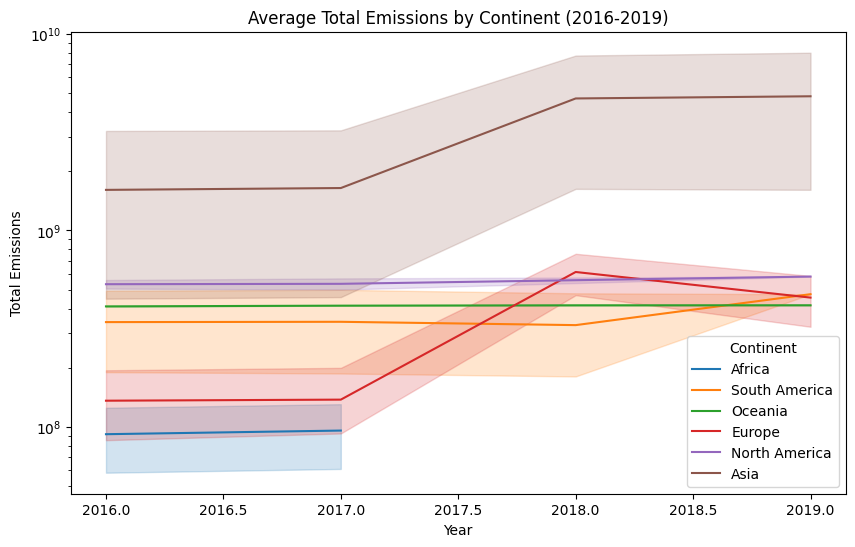

In [ ]:
#data visualization section
#line plot showing total emissions over time by continent
plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df,x="Year",y="emissions_total",hue="Continent",estimator="mean")
plt.yscale("log")
plt.title("Average Total Emissions by Continent (2016-2019)")
plt.ylabel("Total Emissions")
plt.show()

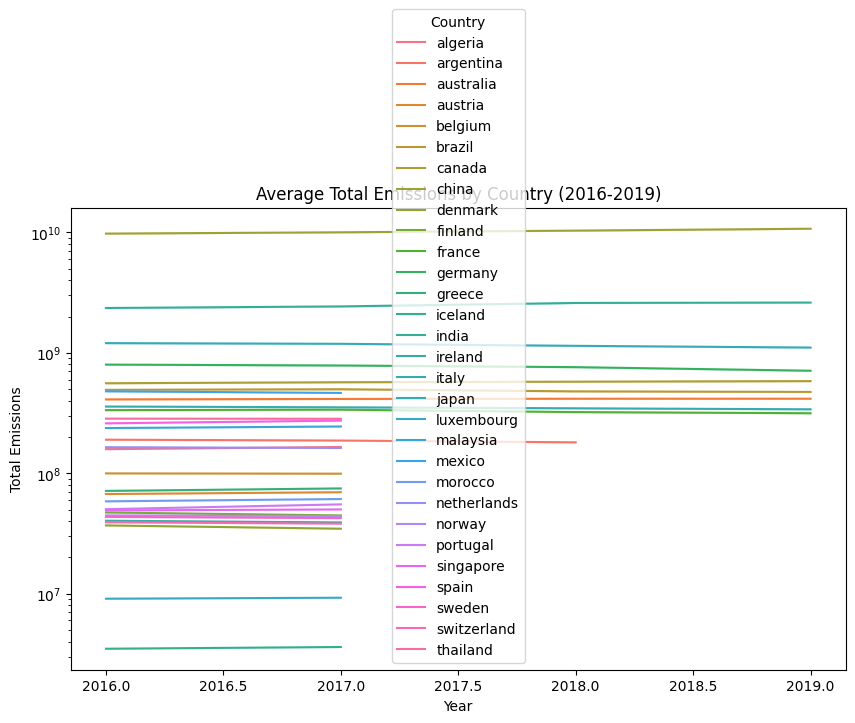

In [ ]:
#data visualization sections
#line plots showing total emissions over time by country (originally there were a lot;commonly there aren't that much )
plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df,x="Year",y="emissions_total",hue="Country",estimator="mean")
plt.yscale("log")
plt.title("Average Total Emissions by Country (2016-2019)")
plt.ylabel("Total Emissions")
plt.show()

In [ ]:
ccpi_df_filtered["Country"].value_counts()

Country
argentina                   4
australia                   4
china                       4
brazil                      4
india                       4
indonesia                   4
germany                     4
france                      4
united kingdom              4
united states               4
mexico                      4
japan                       4
russian federation          4
saudi arabia                4
south africa                4
turkey                      4
canada                      3
italy                       3
cyprus                      2
czech republic              2
croatia                     2
chinese taipei              2
belgium                     2
bulgaria                    2
belarus                     2
egypt                       2
austria                     2
algeria                     2
ireland                     2
iran                        2
hungary                     2
iceland                     2
greece                      2
denmark                     2
finland                     2
estonia                     2
malta                       2
morocco                     2
korea                       2
kazakhstan                  2
lithuania                   2
luxembourg                  2
malaysia                    2
latvia                      2
romania                     2
portugal                    2
poland                      2
norway                      2
new zealand                 2
netherlands                 2
slovak republic             2
singapore                   2
sweden                      2
spain                       2
slovenia                    2
switzerland                 2
ukraine                     2
thailand                    2
republic of korea           2
islamic republic of iran    1
Name: count, dtype: int64

In [ ]:
africa_years=merged_df[merged_df["Continent"]=="Africa"]["Year"].unique()
print(sorted(africa_years))

[np.int64(2016), np.int64(2017)]


In [ ]:
for df, name in [(ccpi_df_clean, "CCPI"), (population_df_filtered, "Population"),
                 (gdp_df_filtered, "GDP"), (co2_df_filtered, "Emissions")]:
    us_years = df[df['Country'] == 'united states']['Year'].unique()
    print(f"{name}: {sorted(us_years)}")

CCPI: [np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Population: []
GDP: [np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
Emissions: [np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]


In [ ]:
for df in [ccpi_df_clean, population_df_filtered, gdp_df_filtered, co2_df_filtered]:
    df['Country'] = df['Country'].str.strip().str.title()

/tmp/ipython-input-2055387509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].str.strip().str.title()


In [ ]:
merged_df = ccpi_df_filtered.merge(population_df_filtered, on=['Country', 'Year'], how='inner') \
                            .merge(gdp_df_filtered, on=['Country', 'Year'], how='inner') \
                            .merge(co2_df_filtered, on=['Country', 'Year'], how='inner')

In [ ]:
print("Final merged shape:", merged_df.shape)
print("Missing values per column:")
print(merged_df.isnull().sum())

Final merged shape: (0, 11)
Missing values per column:
Year                     0
Renewable Energy Rank    0
Country                  0
Continent                0
Efficiency Rank          0
Efficiency Rating        0
Climate Policy Rank      0
Climate Policy Rating    0
Population               0
GDP                      0
emissions_total          0
dtype: int64


In [ ]:
# Define the year range to filter to 2016-2019
start_year = 2016
end_year = 2019  # limit years to 2016-2019

# Function to filter dataframes by year range
def filter_year_range(df):
    return df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

# Re-filter all datasets based on the new year range
ccpi_df_clean = filter_year_range(ccpi_df_clean)
population_df_filtered = filter_year_range(population_df_filtered)
gdp_df_filtered = filter_year_range(gdp_df_filtered)
co2_df_filtered = filter_year_range(co2_df_filtered)

# Strip spaces and standardize country names to Title case
for df in [ccpi_df_clean, population_df_filtered, gdp_df_filtered, co2_df_filtered]:
    df['Country'] = df['Country'].str.strip().str.title()

# Merge datasets on 'Country' and 'Year' columns (Inner Join to keep only common data)
merged_df = ccpi_df_clean.merge(population_df_filtered, on=['Country', 'Year'], how='inner') \
                         .merge(gdp_df_filtered, on=['Country', 'Year'], how='inner') \
                         .merge(co2_df_filtered, on=['Country', 'Year'], how='inner')

# Show final shape and check for missing values
print("Final merged shape:", merged_df.shape)
print("Missing values per column:")
print(merged_df.isnull().sum())

# Check the head of the merged dataframe
print(merged_df.head())

Final merged shape: (227, 11)
Missing values per column:
Year                     0
Renewable Energy Rank    0
Country                  0
Continent                0
Efficiency Rank          0
Efficiency Rating        0
Climate Policy Rank      0
Climate Policy Rating    0
Population               0
GDP                      0
emissions_total          0
dtype: int64
   Year  Renewable Energy Rank    Country      Continent  Efficiency Rank  \
0  2016                   47.0    Algeria         Africa             47.0   
1  2016                   47.0    Algeria         Africa             47.0   
2  2016                   36.0  Argentina  South America             36.0   
3  2016                   36.0  Argentina  South America             36.0   
4  2016                   57.0  Australia        Oceania             57.0   

  Efficiency Rating  Climate Policy Rank Climate Policy Rating  Population  \
0            Medium                 47.0                Medium  40850721.0   
1            M

In [ ]:
merged_df["Country"].value_counts()

Country
Australia      14
Germany        14
Canada         10
Denmark         8
Brazil          8
Belgium         8
Finland         8
France          8
Greece          8
China           8
Luxembourg      8
Malaysia        8
Japan           8
India           8
Sweden          8
Switzerland     8
Thailand        8
Singapore       8
Morocco         8
Portugal        8
Norway          8
Netherlands     8
Italy           6
Argentina       6
Iceland         5
Austria         4
Algeria         4
Ireland         4
Mexico          4
Spain           4
Name: count, dtype: int64

In [ ]:
# Check if United States is in each filtered dataset for years 2016-2019
print("United States in ccpi_df_clean:")
print(ccpi_df_clean[ccpi_df_clean['Country'] == 'United States'])

print("United States in population_df_filtered:")
print(population_df_filtered[population_df_filtered['Country'] == 'United States'])

print("United States in gdp_df_filtered:")
print(gdp_df_filtered[gdp_df_filtered['Country'] == 'United States'])

print("United States in co2_df_filtered:")
print(co2_df_filtered[co2_df_filtered['Country'] == 'United States'])

United States in ccpi_df_clean:
     Year  Renewable Energy Rank        Country      Continent  \
57   2016                   43.0  United States  North America   
115  2017                   43.0  United States  North America   
172  2018                   44.0  United States  North America   
229  2019                   47.0  United States  North America   

     Efficiency Rank Efficiency Rating  Climate Policy Rank  \
57              43.0               Low                 43.0   
115             43.0               Low                 43.0   
172             54.0          Very Low                 58.0   
229             55.0          Very Low                 60.0   

    Climate Policy Rating  
57               Very Low  
115              Very Low  
172              Very Low  
229              Very Low  
United States in population_df_filtered:
Empty DataFrame
Columns: [Country, Year, Population]
Index: []
United States in gdp_df_filtered:
              Country  Year           GDP
1

In [ ]:
# Create a DataFrame for the United States population data (fixing it because it shows up as something else in the population data; manually implementing the data in)
us_population_data = {
    'Country': ['United States'] * 4,
    'Year': [2016, 2017, 2018, 2019],
    'Population': [323.22e6, 325.28e6, 327.02e6, 328.55e6]  # Population in millions
}

us_population_df = pd.DataFrame(us_population_data)

# Append the new data to the population_df_filtered dataframe
population_df_filtered = pd.concat([population_df_filtered, us_population_df], ignore_index=True)

# Now proceed with the merging process
merged_df = ccpi_df_clean.merge(population_df_filtered, on=['Country', 'Year'], how='inner') \
                         .merge(gdp_df_filtered, on=['Country', 'Year'], how='inner') \
                         .merge(co2_df_filtered, on=['Country', 'Year'], how='inner')

# Show final shape and check for missing values
print("Final merged shape:", merged_df.shape)
print("Missing values per column:")
print(merged_df.isnull().sum())

Final merged shape: (235, 11)
Missing values per column:
Year                     0
Renewable Energy Rank    0
Country                  0
Continent                0
Efficiency Rank          0
Efficiency Rating        0
Climate Policy Rank      0
Climate Policy Rating    0
Population               0
GDP                      0
emissions_total          0
dtype: int64


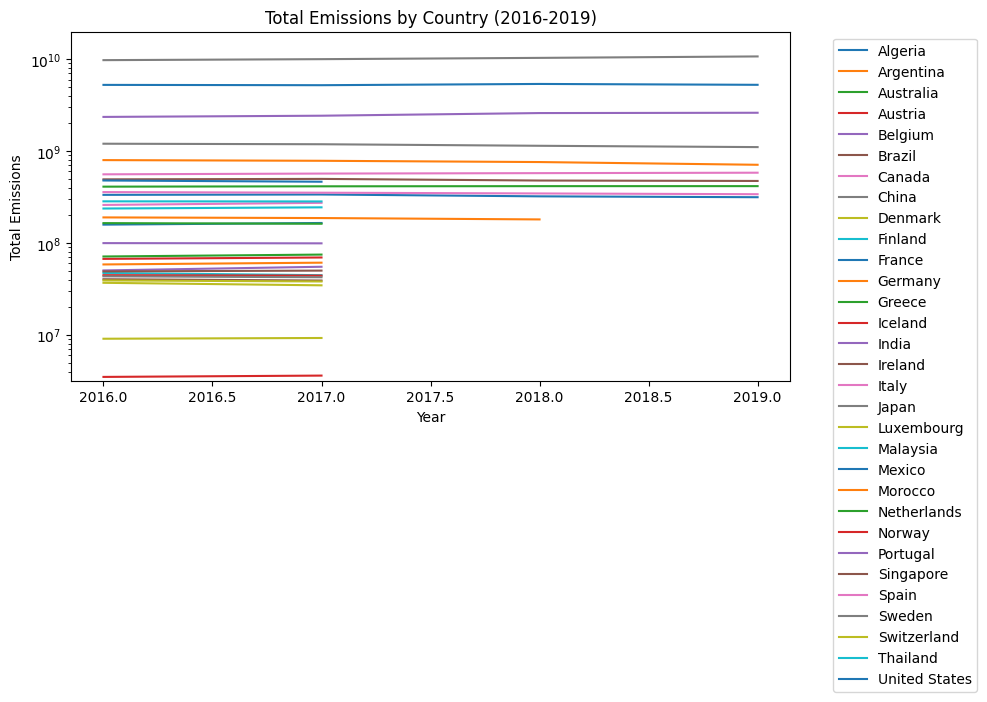

In [ ]:
# Create a plot
plt.figure(figsize=(10,6))

# Plotting total emissions by country
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['emissions_total'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions by Country (2016-2019)')

# Adjust legend position to be outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis to log scale and adjust limits
plt.yscale('log')
plt.ylim(10**6.5, 10**10.3)

# Adjust layout so the legend doesn't overlap with the plot
plt.tight_layout()

# Show the plot
plt.show()

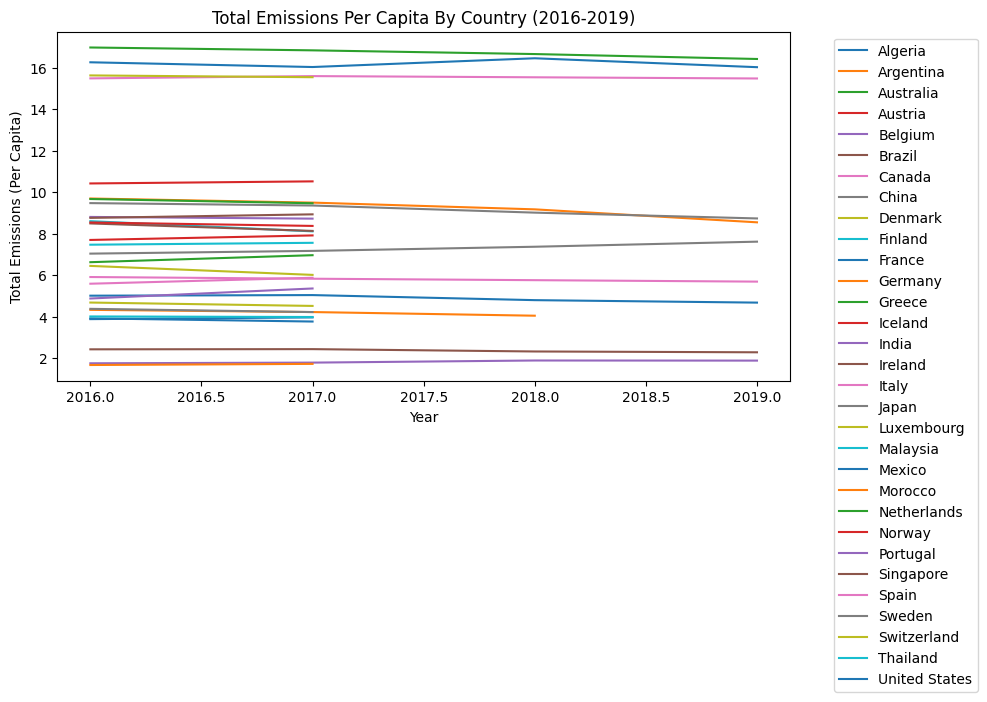

In [ ]:
#create emissions per capita column (y-axis)-more representative
merged_df["Total Emissions Per Capita"]=merged_df["emissions_total"]/merged_df["Population"]

# Create a plot
plt.figure(figsize=(10,6))

# Plotting total emissions by country
for country in merged_df['Country'].unique():
    country_data = merged_df[merged_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Total Emissions Per Capita'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Emissions (Per Capita)')
plt.title('Total Emissions Per Capita By Country (2016-2019)')

# Adjust legend position to be outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set y-axis to log scale and adjust limits
#plt.yscale('log')
#plt.ylim(10**6.5, 10**10.3)

# Adjust layout so the legend doesn't overlap with the plot
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Debugging and Cleaning Up Missing Datasets in the Graph

#Step 1: use as template
# Check if United States is in each filtered dataset for years 2016-2019
print("United States in ccpi_df_clean:")
print(ccpi_df_clean[ccpi_df_clean['Country'] == 'United States'])

print("United States in population_df_filtered:")
print(population_df_filtered[population_df_filtered['Country'] == 'United States'])

print("United States in gdp_df_filtered:")
print(gdp_df_filtered[gdp_df_filtered['Country'] == 'United States'])

print("United States in co2_df_filtered:")
print(co2_df_filtered[co2_df_filtered['Country'] == 'United States'])


#Step 2: go online and find the missing data, and put it in according to this template:
# Create a DataFrame for the United States population data (fixing it because it shows up as something else in the population data; manually implementing the data in)
us_population_data = {
    'Country': ['United States'] * 4,
    'Year': [2016, 2017, 2018, 2019],
    'Population': [323.22e6, 325.28e6, 327.02e6, 328.55e6]  # Population in millions
}

us_population_df = pd.DataFrame(us_population_data)

# Append the new data to the population_df_filtered dataframe
population_df_filtered = pd.concat([population_df_filtered, us_population_df], ignore_index=True)


# Show final shape and check for missing values
print("Final merged shape:", merged_df.shape)
#Always check want 235 rows. Dont go below that.
print("Missing values per column:")
print(merged_df.isnull().sum())

#3 Edit Country Names accordingly. Do this for every country missing.
#4 Have the units NEED TO DO

#New Visualizations to Try
#1. Plot Emissions VS. GDP on Scatter Plot
#2. Plot Emissions VS. Per Capita on scatter plot
#3. Plot Emissions VS. Climate Policy Rank on scatter plot
# PLOT MORE DATA POINTS
# READ ARTICLE ON MODEL BUILDING
# PURCHASE 2 MORE SESSIONS
# Keep in mind for the model building, we are ultimately building a time series model to assess whether according to this trend, countries will meet the Paris Agreement standards. Also, we are assessing whether variables like gdp, population, policy, etc. influence this and to what degree. (2 things we are using AI to solve)
# Next time do literature review
# next time we will build and test the model


United States in ccpi_df_clean:
     Year  Renewable Energy Rank        Country      Continent  \
57   2016                   43.0  United States  North America   
115  2017                   43.0  United States  North America   
172  2018                   44.0  United States  North America   
229  2019                   47.0  United States  North America   

     Efficiency Rank Efficiency Rating  Climate Policy Rank  \
57              43.0               Low                 43.0   
115             43.0               Low                 43.0   
172             54.0          Very Low                 58.0   
229             55.0          Very Low                 60.0   

    Climate Policy Rating  
57               Very Low  
115              Very Low  
172              Very Low  
229              Very Low  
United States in population_df_filtered:
           Country  Year   Population
409  United States  2016  323220000.0
410  United States  2017  325280000.0
411  United States  2018  

In [ ]:
merged_df.head()

Year  Renewable Energy Rank    Country      Continent  Efficiency Rank  \
0  2016                   47.0    Algeria         Africa             47.0   
1  2016                   47.0    Algeria         Africa             47.0   
2  2016                   36.0  Argentina  South America             36.0   
3  2016                   36.0  Argentina  South America             36.0   
4  2016                   57.0  Australia        Oceania             57.0   

  Efficiency Rating  Climate Policy Rank Climate Policy Rating  Population  \
0            Medium                 47.0                Medium  40850721.0   
1            Medium                 47.0                Medium  40850721.0   
2               Low                 36.0                Medium  43900313.0   
3               Low                 36.0                Medium  43900313.0   
4            Medium                 57.0                   Low  24190907.0   

            GDP  emissions_total  Total Emissions Per Capita  
0  1.648734e+11      158481630.0                    3.879531  
1  1.648734e+11      158481630.0                    3.879531  
2  4.865641e+11      189920450.0                    4.326175  
3  4.865641e+11      189920450.0                    4.326175  
4  1.392724e+12      410388100.0                   16.964560

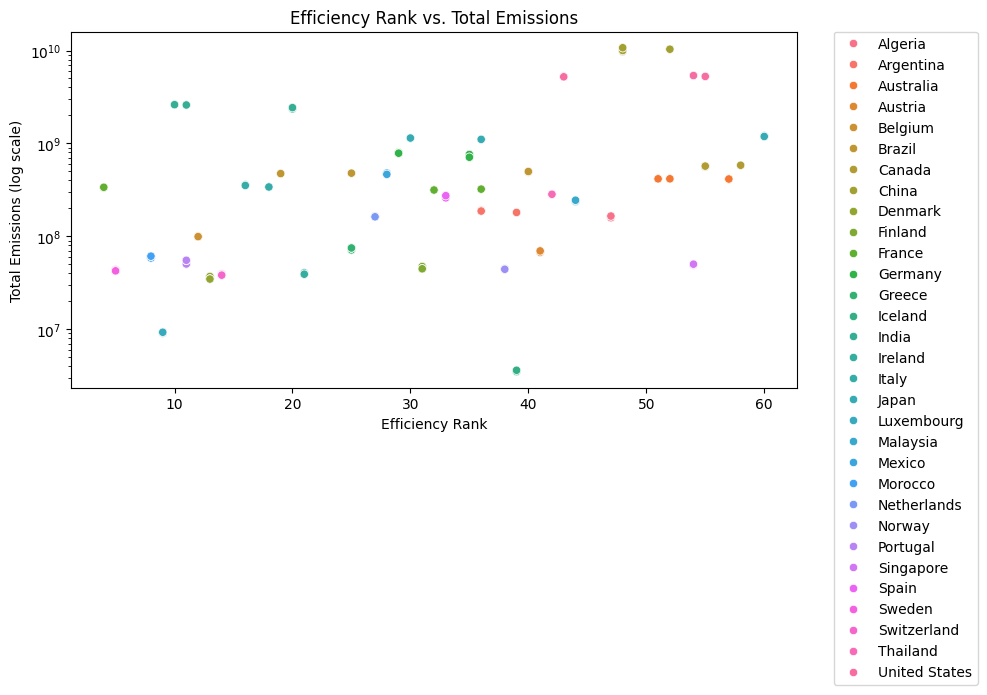

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Efficiency Rank', y='emissions_total', hue='Country')
plt.yscale('log')
plt.title('Efficiency Rank vs. Total Emissions')
plt.xlabel('Efficiency Rank')
plt.ylabel('Total Emissions (log scale)')
plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
plt.tight_layout()
plt.show()

#do capita divided by that though NEED TO DO

In [ ]:
# #July 7, 2025 - Fix this in final session if time allows (data error)
# # adding missing countries from graph(i.e. Saudi Arabia) (TEMPLATE)
# new_data = {
#     'name of Country A': {
#         "GDP": [value_2016, value_2017, value_2018, value_2019], # 1.648734e+11 = format. replace the value_2016 etc with the actual data
#         "Population":[value_2016, value_2017, value_2018, value_2019] # 40850721.0	 = format
#         "emissions_total":[value_2016, value_2017, value_2018, value_2019] #1 58481630.0	= format
#     },
#     'name of Country B': {
#         "GDP": [value_2016, value_2017, value_2018, value_2019], # 1.648734e+11 = format. replace the value_2016 etc with the actual data
#         "Population":[value_2016, value_2017, value_2018, value_2019] # 40850721.0	 = format
#         "emissions_total":[value_2016, value_2017, value_2018, value_2019] #1 58481630.0	= format
#     }    # repeat for all the countries that I want to do
# }

# years = [2016, 2017, 2018, 2019]

# # only work on the top code. as long as the countries have data in the ccpi. this should work for countries that completely dont exist and also for countries that exist partially

# #empty lists to collect the rows
# gdp_rows = []
# population_rows = []
# emissions_rows = []

# # loop through each country and append data
# for country, stats in data.items():
#     for i, year in enumerate(years):
#         gdp_rows.append({"Country": country, "Year": year, "GDP": stats["GDP"][i]})
#         population_rows.append({"Country": country, "Year": year, "Population": stats["Population"][i]})
#         emissions_rows.append({"Country": country, "Year": year, "emissions_total": stats["emissions_total"][i]})

# #convert to dataframes
# new_gdp_df = pd.Dataframe(gdp_rows)
# new_population_df = pd.Dataframe(population_rows)
# new_emissions_df = pd.Dataframe(emissions_rows)

# #Append these new dataframes to original dataframe
# gdp_df_filtered = pd.concat([gdp_df_filtered,new_gdp_df],ignore_index = True)
# population_df_filtered = pd.concat([population_df_filtered,new_population_df],ignore_index = True)
# emissions_df_filtered = pd.concat([emissions_df_filtered,new_emissions_df],ignore_index = True)

# #standardize the country names
# for df in [gdp_df_filtered, population_df_filtered, emissions_df_filtered]:
#     df["Country"]=df["Country"].str.strip().str.title()

In [ ]:
# # Now proceed with the merging process
# merged_df = ccpi_df_clean.merge(population_df_filtered, on=['Country', 'Year'], how='inner') \
#                          .merge(gdp_df_filtered, on=['Country', 'Year'], how='inner') \
#                          .merge(co2_df_filtered, on=['Country', 'Year'], how='inner')

In [ ]:
# merged_df.head()

In [ ]:
# merged_df.info()

In [ ]:
# merged_df.shape

In [ ]:
# merged_df["Year"].value_counts()

Still have to do pre-processing n.  

lag funciton to predict the next year's emission
encode categories to numbers


In [ ]:
# copy the original dataframe
df = merged_df.copy()

#encode categorical columns
label_encoders = {}
categorical_cols = ['Country', 'Continent', 'Efficiency Rating', 'Climate Policy Rating']
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

#sort everything by country and year
df = df.sort_values(by = ['Country', 'Year'])

In [ ]:
#create a lag feature for emissions based on the previous years emissions
df["emissions_lag1"] = df.groupby('Country')["emissions_total"].shift(1)

#drop any rows with NANs created from shifting
df = df.dropna(subset = ["emissions_lag1"])

In [ ]:
df.columns

In [ ]:
# define the input and output columns
features = ['Year', 'Renewable Energy Rank', 'Country', 'Continent',
       'Efficiency Rank', 'Efficiency Rating', 'Climate Policy Rank',
       'Climate Policy Rating', 'Population', 'GDP', 'emissions_lag1']

target = ['emissions_total']

In [ ]:
# split the data into training and testing
train_df = df[df['Year'] <= 2019]

X_train = train_df[features]
y_train = train_df[target]

In [ ]:
# train XGBoost model
model = XGBRegressor(n_estimator = 100, learning_rate = 0.1, random_state = 1)
model.fit(X_train, y_train)

#make predictions for 2030 emissions
# get the last known year which is 2019
latest = merged_df[merged_df['Year'] == 2019].copy()

#add a lag feature emissions from 2019
latest['emissions_lag1'] = latest["emissions_total"]

#set the prediction year to 2030
latest['Year'] = 2030

#re-encode categories using the stored labeling coders
for col in categorical_cols:
  latest[col] = label_encoders[col].transform(latest[col])

#predict emissions for 2030
X_2030 = latest[features]
latest["emissions_2030_predicted"] = model.predict(X_2030)

#show the predictions
result = latest[['Country', 'Continent', 'emissions_2030_predicted']].sort_values(by = 'emissions_2030_predicted', ascending = False)
print(result.head(10))

In [ ]:
#evaluate the model (time series)
#use 2016-2018 for training (understand the pattern between input and output), use 2019 to test (make predictions for the year 2030 based on what its learned)
#define train_df
merged_df['emissions_lag1'] = merged_df.groupby('Country')["emissions_total"].shift(1)

#drop rows with missing lag values
df_model = merged_df.dropna(subset = ["emissions_lag1"])

#encode categorical columns
categorical_cols = ['Country', 'Continent', 'Efficiency Rating', 'Climate Policy Rating']
label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  df_model[col] = le.fit_transform(df_model[col])
  label_encoders[col] = le

# define the input and output columns
features = ['Year', 'Renewable Energy Rank', 'Efficiency Rank', 'Climate Policy Rank', 'Population', 'GDP', 'emissions_lag1'] + categorical_cols

target = ['emissions_total']

#split the data into training and testing
train_df = df_model[df_model['Year'] < 2019]
test_df = df_model[df_model['Year'] == 2019]

#split into X and y.
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

#train the model
model = XGBRegressor(n_estimator = 100, learning_rate = 0.1, random_state = 1)
model.fit(X_train, y_train)

#predict using the test set
y_pred = model.predict(X_test)

#evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#print out results
print(f"mean absolute error: {mae:,.2f}")
print(f"mean squared error: {mse:,.2f}")
print(f"root mean squared error: {rmse:,.2f}")
print(f"r squared: {r2:,.3f}")

August 17, 2025:
2030 forecasting model


In [ ]:
# Define dataset paths
base_path = '/content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/'
ccpi_path = os.path.join(base_path, 'CCPI Data')
co2_path = os.path.join(base_path, 'Our World in Data Annual CO2 Per Country/annual-co2-emissions-per-country.csv')
gdp_path = os.path.join(base_path, 'World Bank Open Data GDP/World Bank Open Data GDP.csv')
population_path = os.path.join(base_path, 'World Bank Open Data Population/World Bank Open Data Population.csv')

rating_mappings = {
    '2016': 'Climate Policy Rating',
    '2017': 'Climate Policy Rating',
    '2018': 'Climate Policy Rating',
    '2019': 'Climate Policy Rating',
    '2020': 'Climate Policy Rating',
    '2021': 'Climate Policy Rating',
    '2022': 'Climate Policy Rating',
    '2023': 'Climate Policy Rating',
    '2024': 'Climate Policy Rating',
    '2025': 'Climate Policy Rating'
}

# --- CCPI Processing ---
def process_ccpi_file(folder_path, year, expected_col):
    files = os.listdir(folder_path)
    file_name = [f for f in files if "Climate Policy" in f][0]
    file_path = os.path.join(folder_path, file_name)
    print(f"Processing {file_path}")

    df = pd.read_csv(file_path)

    # Normalize column names (strip spaces, lowercase)
    df.columns = [c.strip().lower() for c in df.columns]
    expected_col = expected_col.lower()

    # Find matching column
    match = [c for c in df.columns if expected_col in c]
    if not match:
        raise KeyError(f"Expected column '{expected_col}' not found in {file_name}. Available: {df.columns}")

    col = match[0]
    df = df[['country', col]]
    df.rename(columns={'country': 'Country', col: 'Climate Policy Rating'}, inplace=True)
    df['Year'] = int(year)
    return df


ccpi_dfs = []
for year, col_name in rating_mappings.items():
    folder_path = os.path.join(ccpi_path, f'CCPI {year}')
    # print(f'CCPI {year}')
    ccpi_dfs.append(process_ccpi_file(folder_path, year, col_name))

df_ccpi = pd.concat(ccpi_dfs, axis=0, ignore_index=True)
df_ccpi = df_ccpi.groupby(['Country','Year'], as_index=False).first()

# --- CO2 Data ---
df_co2 = pd.read_csv(co2_path)
df_co2 = df_co2[['Country', 'Year', 'emissions_total']]
df_co2.rename(columns={'emissions_total': 'CO2 Emissions'}, inplace=True)

# --- GDP Data ---
df_gdp = pd.read_csv(gdp_path)
df_gdp.rename(columns={'Country Name': 'Country'}, inplace=True)

# # --- Population Data ---
df_population = pd.read_csv(population_path)
df_population.rename(columns={'Country Name': 'Country'}, inplace=True)

# # --- Merge All Datasets ---
df_final = df_co2.merge(df_gdp, on=['Country', 'Year'], how='left')
print(df_final.shape)
# df_final = df_final.dropna()
#remove duplicate
df_final = df_final.drop_duplicates(subset=['Country', 'Year'])

df_final = df_final.merge(df_population, on=['Country', 'Year'], how='left')
#dropna
# df_final = df_final.dropna()
#remove duplicate
df_final = df_final.drop_duplicates(subset=['Country', 'Year'])

df_final = df_final.merge(df_ccpi, on=['Country','Year'], how='outer')
# df_final = df_final.dropna()
# #remove duplicate
# df_final = df_final.drop_duplicates(subset=['Country', 'Year'])
#dropna
# Save merged dataset
df_final.to_csv("/tmp/merged_dataset.csv", index=False)

print("merged datasets saved successfully")

Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2016/CCPI 2016 - 2016 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2017/CCPI 2017 - 2017 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2018/CCPI 2018 - 2018 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2019/CCPI 2019 - 2019 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2020/CCPI 2020 - 2020 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2021/CCPI 2021 - 2021 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2022/CCPI 2022 - 2022 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2023/CCPI 2023 - 2023 Climate Policy.csv
Processing /cont

# Train

In [ ]:
# Define dataset paths
base_path = '/content/drive/My Drive/Education/Research and Publications/Current Research and Publications/Inspirit AI/Inspirit AI Datasets'
ccpi_path = os.path.join(base_path, 'CCPI Data')
co2_path = os.path.join(base_path, 'Our World in Data Annual CO2 Per Country/annual-co2-emissions-per-country.csv')
gdp_path = os.path.join(base_path, 'World Bank Open Data GDP/World Bank Open Data GDP.csv')
population_path = os.path.join(base_path, 'World Bank Open Data Population/World Bank Open Data Population.csv')

rating_mappings = {
    '2016': 'Climate Policy Rating',
    '2017': 'Climate Policy Rating',
    '2018': 'Climate Policy Rating',
    '2019': 'Climate Policy Rating',
    '2020': 'Climate Policy Rating',
    '2021': 'Climate Policy Rating',
    '2022': 'Climate Policy Rating',
    '2023': 'Climate Policy Rating',
    '2024': 'Climate Policy Rating',
    '2025': 'Climate Policy Rating'
}

# --- CCPI Processing ---
def process_ccpi_file(folder_path, year, expected_col):
    files = os.listdir(folder_path)
    file_name = [f for f in files if "Climate Policy" in f][0]
    file_path = os.path.join(folder_path, file_name)
    print(f"Processing {file_path}")

    df = pd.read_csv(file_path)

    # Normalize column names (strip spaces, lowercase)
    df.columns = [c.strip().lower() for c in df.columns]
    expected_col = expected_col.lower()

    # Find matching column
    match = [c for c in df.columns if expected_col in c]
    if not match:
        raise KeyError(f"Expected column '{expected_col}' not found in {file_name}. Available: {df.columns}")

    col = match[0]
    df = df[['country', col]]
    df.rename(columns={'country': 'Country', col: 'Climate Policy Rating'}, inplace=True)
    df['Year'] = int(year)
    return df


ccpi_dfs = []
for year, col_name in rating_mappings.items():
    folder_path = os.path.join(ccpi_path, f'CCPI {year}')
    # print(f'CCPI {year}')
    ccpi_dfs.append(process_ccpi_file(folder_path, year, col_name))

df_ccpi = pd.concat(ccpi_dfs, axis=0, ignore_index=True)
df_ccpi = df_ccpi.groupby(['Country','Year'], as_index=False).first()

# --- CO2 Data ---
df_co2 = pd.read_csv(co2_path)
df_co2 = df_co2[['Country', 'Year', 'emissions_total']]
df_co2.rename(columns={'emissions_total': 'CO2 Emissions'}, inplace=True)

# --- GDP Data ---
df_gdp = pd.read_csv(gdp_path)
df_gdp.rename(columns={'Country Name': 'Country'}, inplace=True)

# # --- Population Data ---
df_population = pd.read_csv(population_path)
df_population.rename(columns={'Country Name': 'Country'}, inplace=True)

# # --- Merge All Datasets ---
df_final1 = df_co2.merge(df_gdp, on=['Country', 'Year'], how='left')
df_final = df_final.dropna()
#remove duplicate
df_final1 = df_final1.drop_duplicates(subset=['Country', 'Year'])

df_final1 = df_final1.merge(df_population, on=['Country', 'Year'], how='left')
#dropna
df_final = df_final.dropna()
#remove duplicate
df_final1 = df_final1.drop_duplicates(subset=['Country', 'Year'])

df_final1 = df_final1.merge(df_ccpi, on=['Country','Year'], how='outer')
df_final1 = df_final.dropna()
# #remove duplicate
df_final1 = df_final1.drop_duplicates(subset=['Country', 'Year'])
#dropna
# Save merged dataset
df_final1.to_csv("/tmp/merged_dataset_dropna.csv", index=False)

print("merged datasets saved successfully")

Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2016/CCPI 2016 - 2016 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2017/CCPI 2017 - 2017 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2018/CCPI 2018 - 2018 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2019/CCPI 2019 - 2019 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2020/CCPI 2020 - 2020 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2021/CCPI 2021 - 2021 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2022/CCPI 2022 - 2022 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2023/CCPI 2023 - 2023 Climate Policy.csv
Processing /cont

In [ ]:
# Define dataset paths
base_path = '/content/drive/My Drive/Education/Research and Publications/Current Research and Publications/Inspirit AI/Inspirit AI Datasets'
ccpi_path = os.path.join(base_path, 'CCPI Data')
co2_path = os.path.join(base_path, 'Our World in Data Annual CO2 Per Country/annual-co2-emissions-per-country.csv')
gdp_path = os.path.join(base_path, 'World Bank Open Data GDP/World Bank Open Data GDP.csv')
population_path = os.path.join(base_path, 'World Bank Open Data Population/World Bank Open Data Population.csv')

rating_mappings = {
    '2016': 'Climate Policy Rating',
    '2017': 'Climate Policy Rating',
    '2018': 'Climate Policy Rating',
    '2019': 'Climate Policy Rating',
    '2020': 'Climate Policy Rating',
    '2021': 'Climate Policy Rating',
    '2022': 'Climate Policy Rating',
    '2023': 'Climate Policy Rating',
    '2024': 'Climate Policy Rating',
    '2025': 'Climate Policy Rating'
}

# --- CCPI Processing ---
def process_ccpi_file(folder_path, year, expected_col):
    files = os.listdir(folder_path)
    file_name = [f for f in files if "Climate Policy" in f][0]
    file_path = os.path.join(folder_path, file_name)
    print(f"Processing {file_path}")

    df = pd.read_csv(file_path)

    # Normalize column names (strip spaces, lowercase)
    df.columns = [c.strip().lower() for c in df.columns]
    expected_col = expected_col.lower()

    # Find matching column
    match = [c for c in df.columns if expected_col in c]
    if not match:
        raise KeyError(f"Expected column '{expected_col}' not found in {file_name}. Available: {df.columns}")

    col = match[0]
    df = df[['country', col]]
    df.rename(columns={'country': 'Country', col: 'Climate Policy Rating'}, inplace=True)
    df['Year'] = int(year)
    return df


ccpi_dfs = []
for year, col_name in rating_mappings.items():
    folder_path = os.path.join(ccpi_path, f'CCPI {year}')
    # print(f'CCPI {year}')
    ccpi_dfs.append(process_ccpi_file(folder_path, year, col_name))

df_ccpi = pd.concat(ccpi_dfs, axis=0, ignore_index=True)
df_ccpi = df_ccpi.groupby(['Country','Year'], as_index=False).first()

# --- CO2 Data ---
df_co2 = pd.read_csv(co2_path)
df_co2 = df_co2[['Country', 'Year', 'emissions_total']]
df_co2.rename(columns={'emissions_total': 'CO2 Emissions'}, inplace=True)

# --- GDP Data ---
df_gdp = pd.read_csv(gdp_path)
df_gdp.rename(columns={'Country Name': 'Country'}, inplace=True)

# # --- Population Data ---
df_population = pd.read_csv(population_path)
df_population.rename(columns={'Country Name': 'Country'}, inplace=True)

# # --- Merge All Datasets ---
df_final1 = df_co2.merge(df_gdp, on=['Country', 'Year'], how='left')
df_final = df_final.dropna()
#remove duplicate
df_final1 = df_final1.drop_duplicates(subset=['Country', 'Year'])

df_final1 = df_final1.merge(df_population, on=['Country', 'Year'], how='left')
#dropna
df_final = df_final.dropna()
#remove duplicate
df_final1 = df_final1.drop_duplicates(subset=['Country', 'Year'])

df_final1 = df_final1.merge(df_ccpi, on=['Country','Year'], how='outer')
df_final1 = df_final.dropna()
# #remove duplicate
df_final1 = df_final1.drop_duplicates(subset=['Country', 'Year'])
#dropna
# Save merged dataset
df_final1.to_csv("/tmp/merged_dataset_dropna.csv", index=False)

print("merged datasets saved successfully")

Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2016/CCPI 2016 - 2016 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2017/CCPI 2017 - 2017 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2018/CCPI 2018 - 2018 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2019/CCPI 2019 - 2019 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2020/CCPI 2020 - 2020 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2021/CCPI 2021 - 2021 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2022/CCPI 2022 - 2022 Climate Policy.csv
Processing /content/drive/MyDrive/CodingMinds/Inspirit AI Datasets/CCPI Data/CCPI 2023/CCPI 2023 - 2023 Climate Policy.csv
Processing /cont

In [ ]:
df_final1.head(100)

Empty DataFrame
Columns: [Country, Year, CO2 Emissions, GDP, Population, Climate Policy Rating, Target_Emissions]
Index: []

In [ ]:
# df_final = df_co2.copy()
df_final['Target_Emissions'] = df_final.groupby('Country')['CO2 Emissions'].shift(-1)
df_train = df_final.dropna(subset=['Target_Emissions'])

In [ ]:
df_final.shape

(0, 7)

In [ ]:
df_train.head(600)

Country  Year  CO2 Emissions           GDP   Population  \
0     Afghanistan  1949   1.465600e+04           NaN          NaN   
1     Afghanistan  1950   8.427200e+04           NaN          NaN   
2     Afghanistan  1951   9.160000e+04           NaN          NaN   
3     Afghanistan  1952   9.160000e+04           NaN          NaN   
4     Afghanistan  1953   1.062560e+05           NaN          NaN   
5     Afghanistan  1954   1.062560e+05           NaN          NaN   
6     Afghanistan  1955   1.538880e+05           NaN          NaN   
7     Afghanistan  1956   1.832000e+05           NaN          NaN   
8     Afghanistan  1957   2.931200e+05           NaN          NaN   
9     Afghanistan  1958   3.297600e+05           NaN          NaN   
10    Afghanistan  1959   3.845710e+05           NaN          NaN   
11    Afghanistan  1960   4.138850e+05  3.521418e+09    9035043.0   
12    Afghanistan  1961   4.907980e+05  2.813572e+09    9214083.0   
13    Afghanistan  1962   6.885940e+05  3.825701e+09    9404406.0   
14    Afghanistan  1963   7.067360e+05  4.520947e+09    9604487.0   
15    Afghanistan  1964   8.385510e+05  5.224897e+09    9814318.0   
16    Afghanistan  1965   1.006917e+06  6.203257e+09   10036008.0   
17    Afghanistan  1966   1.091159e+06  6.971758e+09   10266395.0   
18    Afghanistan  1967   1.281865e+06  9.747886e+09   10505959.0   
19    Afghanistan  1968   1.223391e+06  1.010930e+10   10756922.0   
20    Afghanistan  1969   9.412320e+05  1.241615e+10   11017409.0   
21    Afghanistan  1970   1.670397e+06  1.585667e+10   11290128.0   
22    Afghanistan  1971   1.893554e+06  1.780510e+10   11567667.0   
23    Afghanistan  1972   1.530347e+06  1.990733e+10   11853696.0   
24    Afghanistan  1973   1.635454e+06  2.014642e+10   12157999.0   
25    Afghanistan  1974   1.913152e+06  2.049713e+10   12469127.0   
26    Afghanistan  1975   2.121383e+06  1.913422e+10   12773954.0   
27    Afghanistan  1976   1.980859e+06  1.811657e+10   13059851.0   
28    Afghanistan  1977   2.384175e+06  1.875346e+10   13340756.0   
29    Afghanistan  1978   2.153300e+06  1.805322e+10   13611441.0   
30    Afghanistan  1979   2.232754e+06  1.879944e+10   13655567.0   
31    Afghanistan  1980   1.756302e+06  1.995593e+10   13169311.0   
32    Afghanistan  1981   1.978463e+06  1.426000e+10   11937581.0   
33    Afghanistan  1982   2.094581e+06  1.449724e+10   10991378.0   
34    Afghanistan  1983   2.519954e+06  1.723305e+10   10917982.0   
35    Afghanistan  1984   2.821540e+06           NaN   11190221.0   
36    Afghanistan  1985   3.501422e+06           NaN   11426852.0   
37    Afghanistan  1986   3.133645e+06           NaN   11420074.0   
38    Afghanistan  1987   3.113826e+06           NaN   11387818.0   
39    Afghanistan  1988   2.856896e+06           NaN   11523298.0   
40    Afghanistan  1989   2.764855e+06           NaN   11874088.0   
41    Afghanistan  1990   2.024326e+06           NaN   12045660.0   
42    Afghanistan  1991   1.914301e+06           NaN   12238879.0   
43    Afghanistan  1992   1.482054e+06           NaN   13278974.0   
44    Afghanistan  1993   1.486943e+06           NaN   14943172.0   
45    Afghanistan  1994   1.453829e+06           NaN   16250794.0   
46    Afghanistan  1995   1.417327e+06           NaN   17065836.0   
47    Afghanistan  1996   1.370104e+06           NaN   17763266.0   
48    Afghanistan  1997   1.304152e+06           NaN   18452091.0   
49    Afghanistan  1998   1.278504e+06           NaN   19159996.0   
50    Afghanistan  1999   1.091640e+06           NaN   19887785.0   
51    Afghanistan  2000   1.047128e+06           NaN   20130327.0   
52    Afghanistan  2001   1.069098e+06           NaN   20284307.0   
53    Afghanistan  2002   1.340995e+06           NaN   21378117.0   
54    Afghanistan  2003   1.559602e+06           NaN   22733049.0   
55    Afghanistan  2004   1.237247e+06           NaN   23560654.0   
56    Afghanistan  2005   1.889507e+06           NaN   24404567.0   
57    Af

In [ ]:
df_train.shape

(28890, 7)

In [ ]:
rating_map = {
    "very low": 1,
    "low": 2,
    "medium": 3,
    "high": 4,
    "very high": 5
}
policy_cols = [c for c in df_train.columns if "Climate Policy Rating" in c]

for col in policy_cols:
    # convert to lowercase and map
    df_train[col] = df_train[col].astype(str).str.lower().map(rating_map)

X = df_train[['Year', 'CO2 Emissions', 'GDP', 'Population'] + policy_cols]
# X = df_train[['Year', 'CO2 Emissions', 'GDP', 'Population']]
y = df_train['Target_Emissions']

/tmp/ipython-input-291517903.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = df_train[col].astype(str).str.lower().map(rating_map)


In [ ]:
#remove dupicate rows
df_train = df_train.drop_duplicates().reset_index(drop=True)
#
df_train.head(800)

Country  Year  CO2 Emissions           GDP   Population  \
0            Afghanistan  1949   1.465600e+04           NaN          NaN   
1            Afghanistan  1950   8.427200e+04           NaN          NaN   
2            Afghanistan  1951   9.160000e+04           NaN          NaN   
3            Afghanistan  1952   9.160000e+04           NaN          NaN   
4            Afghanistan  1953   1.062560e+05           NaN          NaN   
5            Afghanistan  1954   1.062560e+05           NaN          NaN   
6            Afghanistan  1955   1.538880e+05           NaN          NaN   
7            Afghanistan  1956   1.832000e+05           NaN          NaN   
8            Afghanistan  1957   2.931200e+05           NaN          NaN   
9            Afghanistan  1958   3.297600e+05           NaN          NaN   
10           Afghanistan  1959   3.845710e+05           NaN          NaN   
11           Afghanistan  1960   4.138850e+05  3.521418e+09    9035043.0   
12           Afghanistan  1961   4.907980e+05  2.813572e+09    9214083.0   
13           Afghanistan  1962   6.885940e+05  3.825701e+09    9404406.0   
14           Afghanistan  1963   7.067360e+05  4.520947e+09    9604487.0   
15           Afghanistan  1964   8.385510e+05  5.224897e+09    9814318.0   
16           Afghanistan  1965   1.006917e+06  6.203257e+09   10036008.0   
17           Afghanistan  1966   1.091159e+06  6.971758e+09   10266395.0   
18           Afghanistan  1967   1.281865e+06  9.747886e+09   10505959.0   
19           Afghanistan  1968   1.223391e+06  1.010930e+10   10756922.0   
20           Afghanistan  1969   9.412320e+05  1.241615e+10   11017409.0   
21           Afghanistan  1970   1.670397e+06  1.585667e+10   11290128.0   
22           Afghanistan  1971   1.893554e+06  1.780510e+10   11567667.0   
23           Afghanistan  1972   1.530347e+06  1.990733e+10   11853696.0   
24           Afghanistan  1973   1.635454e+06  2.014642e+10   12157999.0   
25           Afghanistan  1974   1.913152e+06  2.049713e+10   12469127.0   
26           Afghanistan  1975   2.121383e+06  1.913422e+10   12773954.0   
27           Afghanistan  1976   1.980859e+06  1.811657e+10   13059851.0   
28           Afghanistan  1977   2.384175e+06  1.875346e+10   13340756.0   
29           Afghanistan  1978   2.153300e+06  1.805322e+10   13611441.0   
30           Afghanistan  1979   2.232754e+06  1.879944e+10   13655567.0   
31           Afghanistan  1980   1.756302e+06  1.995593e+10   13169311.0   
32           Afghanistan  1981   1.978463e+06  1.426000e+10   11937581.0   
33           Afghanistan  1982   2.094581e+06  1.449724e+10   10991378.0   
34           Afghanistan  1983   2.519954e+06  1.723305e+10   10917982.0   
35           Afghanistan  1984   2.821540e+06           NaN   11190221.0   
36           Afghanistan  1985   3.501422e+06           NaN   11426852.0   
37           Afghanistan  1986   3.133645e+06           NaN   11420074.0   
38           Afghanistan  1987   3.113826e+06           NaN   11387818.0   
39           Afghanistan  1988   2.856896e+06           NaN   11523298.0   
40           Afghanistan  1989   2.764855e+06           NaN   11874088.0   
41           Afghanistan  1990   2.024326e+06           NaN   12045660.0   
42           Afghanistan  1991   1.914301e+06           NaN   12238879.0   
43           Afghanistan  1992   1.482054e+06           NaN   13278974.0   
44           Afghanistan  1993   1.486943e+06           NaN   14943172.0   
45           Afghanistan  1994   1.453829e+06           NaN   16250794.0   
46           Afghanistan  1995   1.417327e+06           NaN   17065836.0   
47           Afghanistan  1996   1.370104e+06           NaN   17763266.0   
48           Afghanistan  1997   1.304152e+06           NaN   18452091.0   
49           Afghanistan  1998   1.278504e+06           NaN   19159996.0   
50           Afghanistan  1999   1.091640e+06           NaN   19887785.0   
51           Afghanistan  2000   1.047128e+06           NaN   201

In [ ]:
# df_train[policy_cols] = df_train[policy_cols].fillna(df_train[policy_cols].median())

#fill the nan value with the previous or next row
df_train = df_train.fillna(method='ffill')
df_train = df_train.fillna(method='bfill')



/tmp/ipython-input-972366260.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method='ffill')
/tmp/ipython-input-972366260.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train.fillna(method='bfill')


In [ ]:
df_train.head(1500)

Country  Year  CO2 Emissions           GDP   Population  \
0             Afghanistan  1949   1.465600e+04  3.521418e+09    9035043.0   
1             Afghanistan  1950   8.427200e+04  3.521418e+09    9035043.0   
2             Afghanistan  1951   9.160000e+04  3.521418e+09    9035043.0   
3             Afghanistan  1952   9.160000e+04  3.521418e+09    9035043.0   
4             Afghanistan  1953   1.062560e+05  3.521418e+09    9035043.0   
5             Afghanistan  1954   1.062560e+05  3.521418e+09    9035043.0   
6             Afghanistan  1955   1.538880e+05  3.521418e+09    9035043.0   
7             Afghanistan  1956   1.832000e+05  3.521418e+09    9035043.0   
8             Afghanistan  1957   2.931200e+05  3.521418e+09    9035043.0   
9             Afghanistan  1958   3.297600e+05  3.521418e+09    9035043.0   
10            Afghanistan  1959   3.845710e+05  3.521418e+09    9035043.0   
11            Afghanistan  1960   4.138850e+05  3.521418e+09    9035043.0   
12            Afghanistan  1961   4.907980e+05  2.813572e+09    9214083.0   
13            Afghanistan  1962   6.885940e+05  3.825701e+09    9404406.0   
14            Afghanistan  1963   7.067360e+05  4.520947e+09    9604487.0   
15            Afghanistan  1964   8.385510e+05  5.224897e+09    9814318.0   
16            Afghanistan  1965   1.006917e+06  6.203257e+09   10036008.0   
17            Afghanistan  1966   1.091159e+06  6.971758e+09   10266395.0   
18            Afghanistan  1967   1.281865e+06  9.747886e+09   10505959.0   
19            Afghanistan  1968   1.223391e+06  1.010930e+10   10756922.0   
20            Afghanistan  1969   9.412320e+05  1.241615e+10   11017409.0   
21            Afghanistan  1970   1.670397e+06  1.585667e+10   11290128.0   
22            Afghanistan  1971   1.893554e+06  1.780510e+10   11567667.0   
23            Afghanistan  1972   1.530347e+06  1.990733e+10   11853696.0   
24            Afghanistan  1973   1.635454e+06  2.014642e+10   12157999.0   
25            Afghanistan  1974   1.913152e+06  2.049713e+10   12469127.0   
26            Afghanistan  1975   2.121383e+06  1.913422e+10   12773954.0   
27            Afghanistan  1976   1.980859e+06  1.811657e+10   13059851.0   
28            Afghanistan  1977   2.384175e+06  1.875346e+10   13340756.0   
29            Afghanistan  1978   2.153300e+06  1.805322e+10   13611441.0   
30            Afghanistan  1979   2.232754e+06  1.879944e+10   13655567.0   
31            Afghanistan  1980   1.756302e+06  1.995593e+10   13169311.0   
32            Afghanistan  1981   1.978463e+06  1.426000e+10   11937581.0   
33            Afghanistan  1982   2.094581e+06  1.449724e+10   10991378.0   
34            Afghanistan  1983   2.519954e+06  1.723305e+10   10917982.0   
35            Afghanistan  1984   2.821540e+06  1.723305e+10   11190221.0   
36            Afghanistan  1985   3.501422e+06  1.723305e+10   11426852.0   
37            Afghanistan  1986   3.133645e+06  1.723305e+10   11420074.0   
38            Afghanistan  1987   3.113826e+06  1.723305e+10   11387818.0   
39            Afghanistan  1988   2.856896e+06  1.723305e+10   11523298.0   
40            Afghanistan  1989   2.764855e+06  1.723305e+10   11874088.0   
41            Afghanistan  1990   2.024326e+06  1.723305e+10   12045660.0   
42            Afghanistan  1991   1.914301e+06  1.723305e+10   12238879.0   
43            Afghanistan  1992   1.482054e+06  1.723305e+10   13278974.0   
44            Afghanistan  1993   1.486943e+06  1.723305e+10   14943172.0   
45            Afghanistan  1994   1.453829e+06  1.723305e+10   16250794.0   
46            Afghanistan  1995   1.417327e+06  1.723305e+10   17065836.0   
47            Afghanistan  1996   1.370104e+06  1.723305e+10   17763266.0   
48            Afghanistan  1997   1.304152e+06  1.723305e+10   18452091.0   
49            Afghanistan  1998   1.278504e+06  1.723305e+10   19159996.0   
50            Afghanistan  1999   1.091640e+06  1.723305e+10   19887785.0   
51            

In [ ]:
df_train.isna().sum()

Country                  0
Year                     0
CO2 Emissions            0
GDP                      0
Population               0
Climate Policy Rating    0
Target_Emissions         0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

print("R²:", model.score(X_test, y_test))

R²: 0.9575643322816592


In [ ]:
X_train.shape

(23112, 5)

In [ ]:
# Apply rating map to the full df_final, not just training
for col in [c for c in df_final.columns if "Climate Policy Rating" in c]:
    df_final[col] = df_final[col].astype(str).str.lower().map(rating_map)

# Handle missing values consistently
df_final[policy_cols] = df_final[policy_cols].fillna(df_train[policy_cols].median())

In [ ]:
df_final.head()

Country  Year  CO2 Emissions  GDP  Population  Climate Policy Rating  \
0  Afghanistan  1949        14656.0  NaN         NaN                    3.0   
1  Afghanistan  1950        84272.0  NaN         NaN                    3.0   
2  Afghanistan  1951        91600.0  NaN         NaN                    3.0   
3  Afghanistan  1952        91600.0  NaN         NaN                    3.0   
4  Afghanistan  1953       106256.0  NaN         NaN                    3.0   

   Target_Emissions  
0           84272.0  
1           91600.0  
2           91600.0  
3          106256.0  
4          106256.0

In [ ]:
predictions = {}
latest = df_final[df_final['Year'] == df_final['Year'].max()].copy()

for year in range(2026, 2031):
    X_latest = latest[['Year','CO2 Emissions','GDP','Population', 'Climate Policy Rating']]
    print(X_latest.head())
    print(X_latest.shape)

    pred = model.predict(X_latest)[0]
    predictions[year] = pred

    # update for next year
    latest['CO2 Emissions'] = pred
    latest['Year'] = year

print(predictions)

      Year  CO2 Emissions  GDP  Population  Climate Policy Rating
589   2025            NaN  NaN         NaN                    1.0
1012  2025            NaN  NaN         NaN                    1.0
2280  2025            NaN  NaN         NaN                    2.0
2488  2025            NaN  NaN         NaN                    3.0
3162  2025            NaN  NaN         NaN                    1.0
(64, 5)
      Year  CO2 Emissions  GDP  Population  Climate Policy Rating
589   2026   3.773281e+10  NaN         NaN                    1.0
1012  2026   3.773281e+10  NaN         NaN                    1.0
2280  2026   3.773281e+10  NaN         NaN                    2.0
2488  2026   3.773281e+10  NaN         NaN                    3.0
3162  2026   3.773281e+10  NaN         NaN                    1.0
(64, 5)
      Year  CO2 Emissions  GDP  Population  Climate Policy Rating
589   2027   3.773281e+10  NaN         NaN                    1.0
1012  2027   3.773281e+10  NaN         NaN                  

In [ ]:
print(latest)

                        Country  Year  CO2 Emissions  GDP  Population  \
589                     Algeria  2030   3.773281e+10  NaN         NaN   
1012                  Argentina  2030   3.773281e+10  NaN         NaN   
2280                  Australia  2030   3.773281e+10  NaN         NaN   
2488                    Austria  2030   3.773281e+10  NaN         NaN   
3162                    Belarus  2030   3.773281e+10  NaN         NaN   
3359                    Belgium  2030   3.773281e+10  NaN         NaN   
4218                     Brazil  2030   3.773281e+10  NaN         NaN   
4516                   Bulgaria  2030   3.773281e+10  NaN         NaN   
5048                     Canada  2030   3.773281e+10  NaN         NaN   
5626                      Chile  2030   3.773281e+10  NaN         NaN   
5745                      China  2030   3.773281e+10  NaN         NaN   
5755             Chinese Taipei  2030   3.773281e+10  NaN         NaN   
5969                   Colombia  2030   3.773281e+1

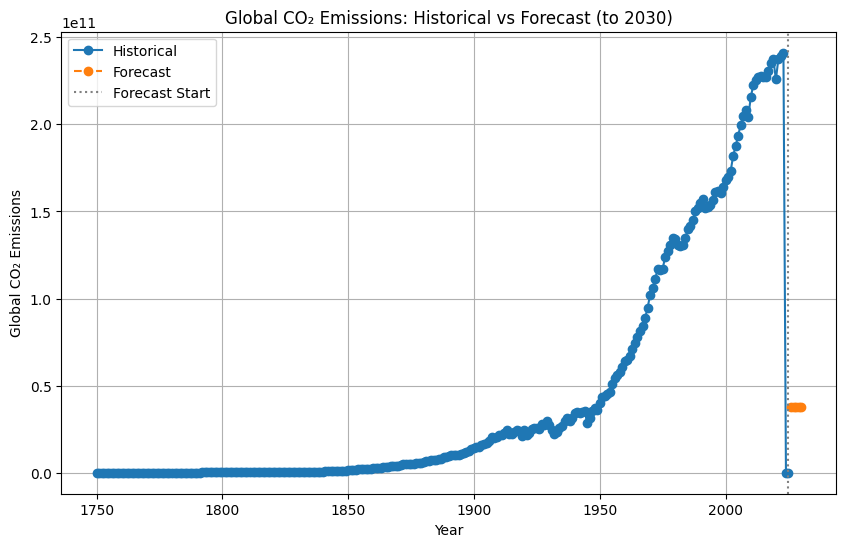

In [ ]:
# Historical emissions (global sum)
historical = df_final[df_final['Year'] <= 2025].groupby("Year")["CO2 Emissions"].sum()

# Forecast from your predictions dict
forecast_years = list(predictions.keys())
forecast_values = list(predictions.values())

plt.figure(figsize=(10,6))
plt.plot(historical.index, historical.values, label="Historical", marker="o")
plt.plot(forecast_years, forecast_values, label="Forecast", marker="o", linestyle="--")
plt.axvline(2025, color="gray", linestyle=":", label="Forecast Start")

plt.xlabel("Year")
plt.ylabel("Global CO₂ Emissions")
plt.title("Global CO₂ Emissions: Historical vs Forecast (to 2030)")
plt.legend()
plt.grid(True)
plt.show()

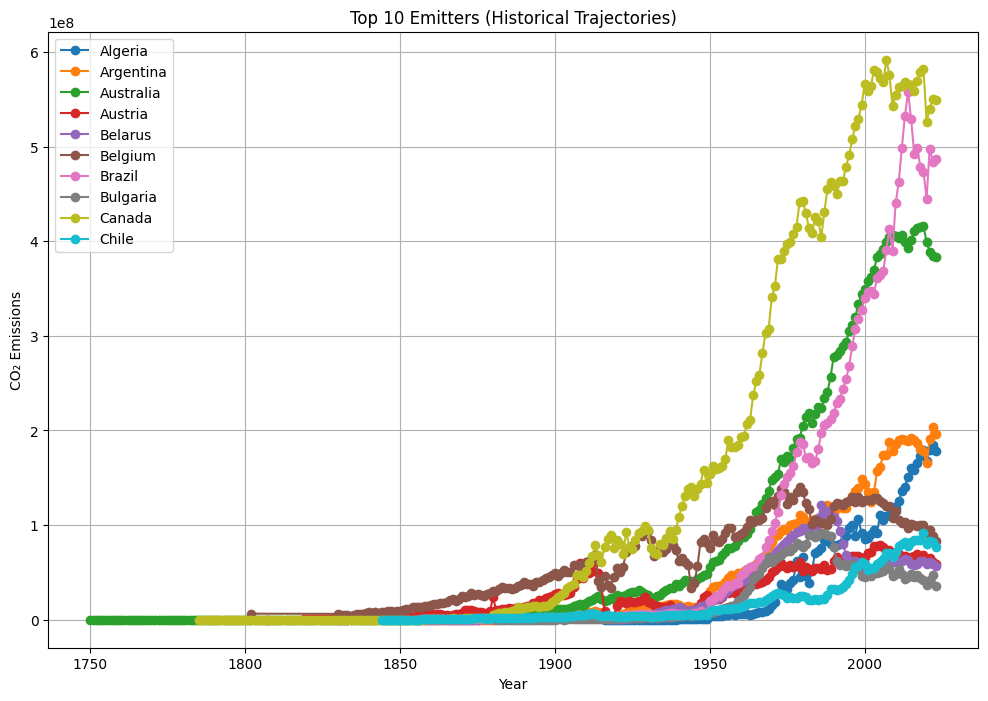

Correlation of Policy Ratings with CO₂ Emissions:
Climate Policy Rating    0.002822
CO2 Emissions            1.000000
Name: CO2 Emissions, dtype: float64


In [ ]:
# Top 10 emitters in latest year
top_emitters = df_final[df_final["Year"] == 2025].nlargest(10, "CO2 Emissions")["Country"]

# Historical trajectories for top emitters
plt.figure(figsize=(12,8))
for country in top_emitters:
    subset = df_final[df_final["Country"] == country]
    plt.plot(subset["Year"], subset["CO2 Emissions"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.title("Top 10 Emitters (Historical Trajectories)")
plt.legend()
plt.grid(True)
plt.show()

# Correlation between policy ratings and emission growth
policy_cols = [c for c in df_final.columns if "Climate Policy Rating" in c]
corrs = df_final[policy_cols + ["CO2 Emissions"]].corr()["CO2 Emissions"].sort_values()

print("Correlation of Policy Ratings with CO₂ Emissions:")
print(corrs)

In [ ]:
df_final[df_final["Year"] >= 2000].groupby("Year")["CO2 Emissions"].sum()

Year
2000    1.680101e+11
2001    1.695672e+11
2002    1.729747e+11
2003    1.817646e+11
2004    1.875145e+11
2005    1.934239e+11
2006    1.996775e+11
2007    2.049433e+11
2008    2.080953e+11
2009    2.040046e+11
2010    2.154827e+11
2011    2.223895e+11
2012    2.255935e+11
2013    2.270133e+11
2014    2.274704e+11
2015    2.272114e+11
2016    2.273020e+11
2017    2.308815e+11
2018    2.352573e+11
2019    2.372894e+11
2020    2.258156e+11
2021    2.376624e+11
2022    2.389626e+11
2023    2.411167e+11
2024    0.000000e+00
2025    0.000000e+00
Name: CO2 Emissions, dtype: float64

R² Score: 0.9564589441742783
Forecasted emissions (global sample): {2026: np.float32(181898340.0), 2027: np.float32(181898340.0), 2028: np.float32(181898340.0), 2029: np.float32(181898340.0), 2030: np.float32(181898340.0)}


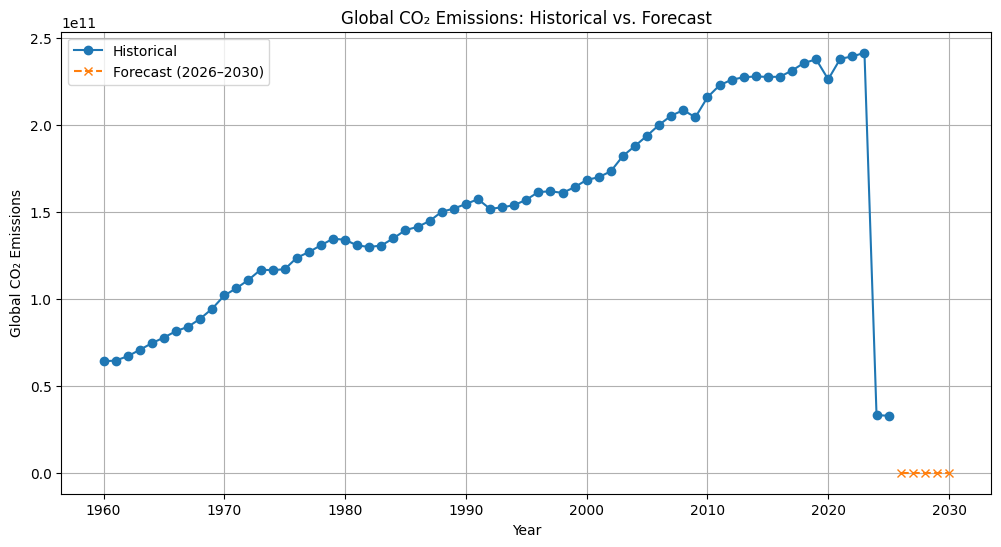

In [ ]:
# === 1. Clean Dataset ===

rating_map = {
    "very low": 1,
    "low": 2,
    "medium": 3,
    "high": 4,
    "very high": 5
}

# Apply rating map across all CCPI columns
policy_cols = [c for c in df_final.columns if "Climate Policy Rating" in c]
for col in policy_cols:
    df_final[col] = df_final[col].astype(str).str.lower().map(rating_map)

# Drop early years (pre-1960, low quality data)
df_final = df_final[df_final["Year"] >= 1960].copy()

# Fill missing policy values with median
df_final[policy_cols] = df_final[policy_cols].fillna(df_final[policy_cols].median())

# Replace negative or zero emissions with NaN and interpolate
df_final.loc[df_final["CO2 Emissions"] <= 0, "CO2 Emissions"] = np.nan
df_final["CO2 Emissions"] = df_final.groupby("Country")["CO2 Emissions"].transform(lambda x: x.interpolate())

# Drop rows still missing emissions
df_final = df_final.dropna(subset=["CO2 Emissions"])

# === 2. Build Training Data ===

df_final['Target_Emissions'] = df_final.groupby('Country')['CO2 Emissions'].shift(-1)
df_train = df_final.dropna(subset=['Target_Emissions'])

X = df_train[['Year', 'CO2 Emissions', 'GDP', 'Population'] + policy_cols]
y = df_train['Target_Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# === 3. Train Model ===

model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

print("R² Score:", model.score(X_test, y_test))

# === 4. Forecast 2026–2030 ===

predictions = {}
latest = df_final[df_final['Year'] == df_final['Year'].max()].copy()

for year in range(2026, 2031):
    X_latest = latest[['Year', 'CO2 Emissions', 'GDP', 'Population'] + policy_cols]
    pred = model.predict(X_latest)[0]
    pred = max(0, pred)  # clip at 0
    predictions[year] = pred

    # Update for recursive forecasting
    latest['CO2 Emissions'] = pred
    latest['Year'] = year

print("Forecasted emissions (global sample):", predictions)

# === 5. Plot Historical vs Forecasted ===

# Aggregate global totals
global_hist = df_final.groupby("Year")["CO2 Emissions"].sum()

plt.figure(figsize=(12,6))
plt.plot(global_hist.index, global_hist.values, label="Historical", marker="o")

# Add forecast
forecast_years = list(predictions.keys())
forecast_vals = list(predictions.values())
plt.plot(forecast_years, forecast_vals, label="Forecast (2026–2030)", marker="x", linestyle="--")

plt.xlabel("Year")
plt.ylabel("Global CO₂ Emissions")
plt.title("Global CO₂ Emissions: Historical vs. Forecast")
plt.legend()
plt.grid(True)
plt.show()

## Arima


In [ ]:
df_co2.head()

Country  Year  CO2 Emissions
0  Afghanistan  1949        14656.0
1  Afghanistan  1950        84272.0
2  Afghanistan  1951        91600.0
3  Afghanistan  1952        91600.0
4  Afghanistan  1953       106256.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

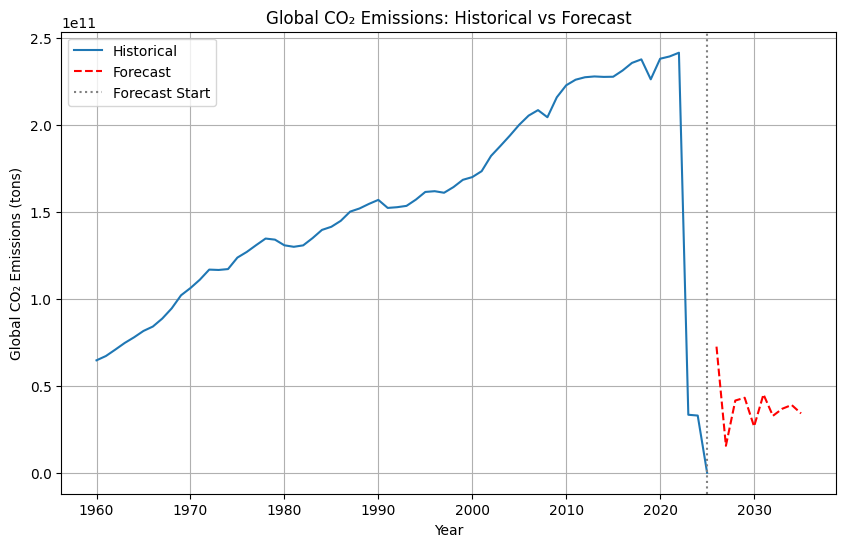

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Build time series of global emissions
global_emissions = df_final.groupby("Year")["Target_Emissions"].sum()

# Fit ARIMA
model = ARIMA(global_emissions, order=(2,1,2))  # (p,d,q)
model_fit = model.fit()

# Forecast next 10 years (2024–2033)
forecast = model_fit.forecast(steps=10)

# Plot
plt.figure(figsize=(10,6))
plt.plot(global_emissions.index, global_emissions.values, label="Historical")
plt.plot(range(global_emissions.index.max()+1, global_emissions.index.max()+1+len(forecast)),
         forecast, label="Forecast", linestyle="--", color="red")
plt.axvline(global_emissions.index.max(), color="gray", linestyle=":", label="Forecast Start")
plt.xlabel("Year")
plt.ylabel("Global CO₂ Emissions (tons)")
plt.title("Global CO₂ Emissions: Historical vs Forecast")
plt.legend()
plt.grid(True)
plt.show()


# Setup


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os
import re
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from pickle import NONE
pd.set_option("display.max_rows",None)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/My Drive/Education/Research and Publications/Current Research and Publications/Inspirit AI/Inspirit AI Datasets'
co2_path = os.path.join(base_path, 'Our World in Data Annual CO2 Per Country/annual-co2-emissions-per-country.csv')

# --- CO2 Data ---
df_co2 = pd.read_csv(co2_path)
df_co2 = df_co2[['Country', 'Year', 'emissions_total']]
df_co2.rename(columns={'emissions_total': 'CO2 Emissions'}, inplace=True)

# Prophet

In [ ]:
df_final = df_co2.copy()
df_final['Target_Emissions'] = df_final.groupby('Country')['CO2 Emissions'].shift(-1)
df_train = df_final.dropna(subset=['Target_Emissions'])

## Global


          ds           y
0 1750-01-01  56443374.0
1 1751-01-01  57031008.0
2 1752-01-01  57662940.0
3 1753-01-01  58401480.0
4 1754-01-01  58760808.0


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwe0oa_5/8fbmgbr0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwe0oa_5/q1w4cuid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70317', 'data', 'file=/tmp/tmpiwe0oa_5/8fbmgbr0.json', 'init=/tmp/tmpiwe0oa_5/q1w4cuid.json', 'output', 'file=/tmp/tmpiwe0oa_5/prophet_modelexr3_wav/prophet_model-20250829232616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:26:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:26:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/

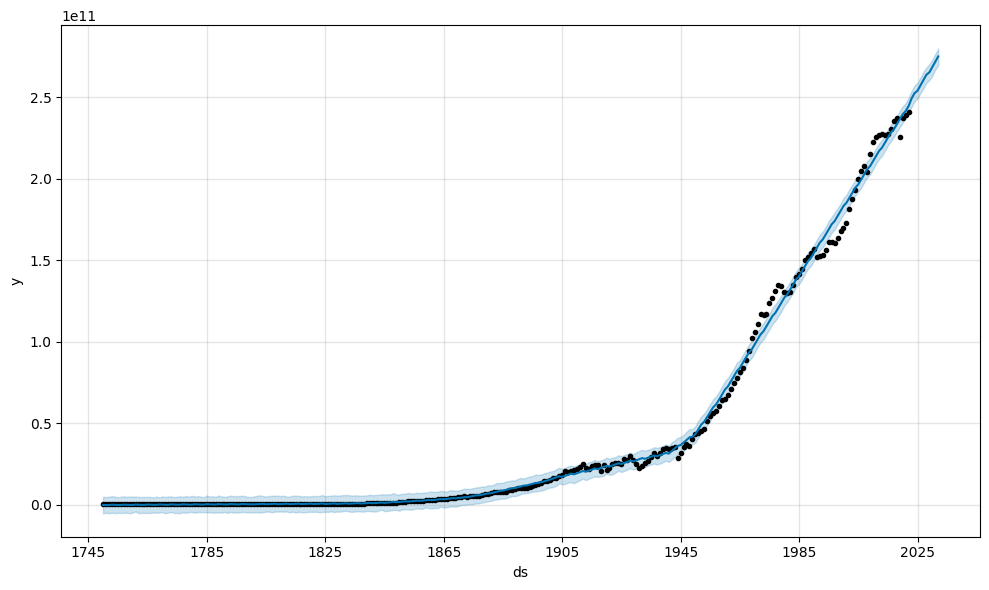

In [ ]:
from prophet import Prophet
import pandas as pd

# Aggregate global CO2 emissions
global_emissions = df_final.groupby("Year")["Target_Emissions"].sum().reset_index()

# Rename columns for Prophet
global_emissions.rename(columns={"Year": "ds", "Target_Emissions": "y"}, inplace=True)

# Make sure Year is datetime
global_emissions['ds'] = pd.to_datetime(global_emissions['ds'], format='%Y')

# Remove non-positive values (Prophet can't handle 0 or negative)
global_emissions = global_emissions[global_emissions['y'] > 0]

print(global_emissions.head())   # sanity check

m = Prophet()
m.fit(global_emissions)

# Forecast next 10 years
future = m.make_future_dataframe(periods=10, freq='Y')
forecast = m.predict(future)

# Plot
fig = m.plot(forecast)



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr6_uo99b/lt79kwoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr6_uo99b/kf5ezuzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10886', 'data', 'file=/tmp/tmpr6_uo99b/lt79kwoa.json', 'init=/tmp/tmpr6_uo99b/kf5ezuzc.json', 'output', 'file=/tmp/tmpr6_uo99b/prophet_modelt3rmoz9w/prophet_model-20250829193553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:35:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


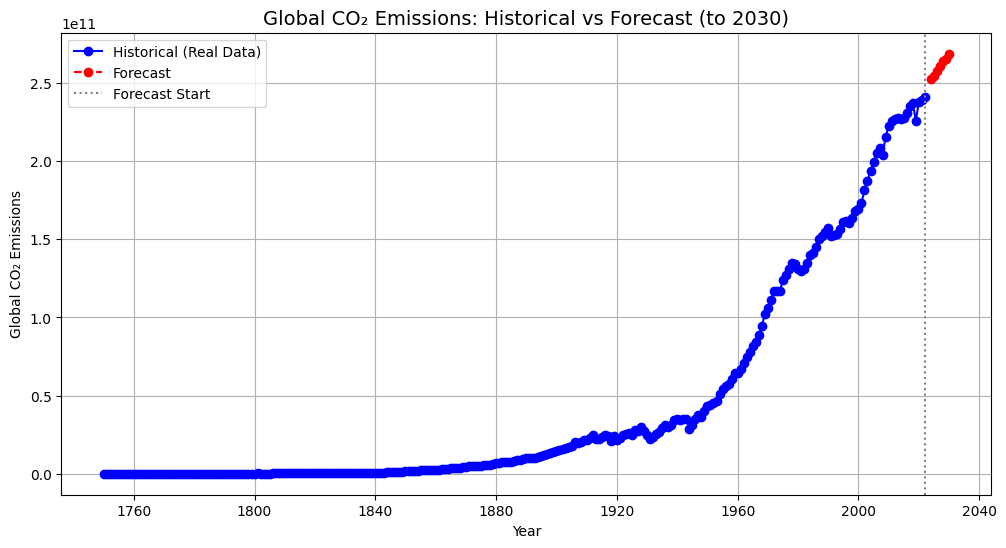

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np

# --- Prepare data ---

# Aggregate global CO2 emissions
global_emissions = df_final.groupby("Year")["Target_Emissions"].sum().reset_index()

# Rename columns for Prophet
global_emissions.rename(columns={"Year": "ds", "Target_Emissions": "y"}, inplace=True)
global_emissions['ds'] = pd.to_datetime(global_emissions['ds'], format='%Y')
global_emissions = global_emissions[global_emissions['y'] > 0]  # remove zeros

# --- Fit Prophet model ---
# Fit Prophet
m = Prophet()
m.fit(global_emissions)

# Forecast until 2030
last_year = global_emissions['ds'].dt.year.max()
horizon = 2030 - last_year
future = m.make_future_dataframe(periods=horizon, freq='YE')
forecast = m.predict(future)

# Split forecast vs historical
forecast_part = forecast[forecast['ds'].dt.year > last_year]
historical_part = global_emissions

# Plot
plt.figure(figsize=(12,6))
plt.plot(historical_part['ds'], historical_part['y'], label="Historical (Real Data)", color="blue", marker="o")
plt.plot(forecast_part['ds'], forecast_part['yhat'], label="Forecast", color="red", linestyle="--", marker="o")

# Add forecast start marker
plt.axvline(pd.to_datetime(f"{last_year}", format="%Y"), color="gray", linestyle=":", label="Forecast Start")

plt.title("Global CO₂ Emissions: Historical vs Forecast (to 2030)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Global CO₂ Emissions")
plt.legend()
plt.grid(True)
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr6_uo99b/nia4xfg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr6_uo99b/unrbucgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28175', 'data', 'file=/tmp/tmpr6_uo99b/nia4xfg3.json', 'init=/tmp/tmpr6_uo99b/unrbucgh.json', 'output', 'file=/tmp/tmpr6_uo99b/prophet_model6y6379mm/prophet_model-20250829201201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:12:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


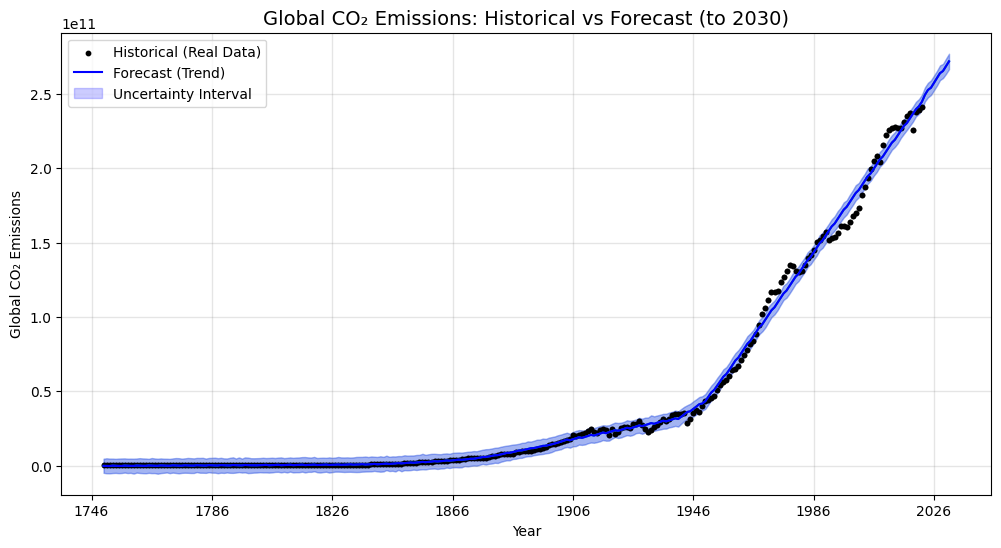

In [ ]:
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np

# --- Prepare data ---

# Aggregate global CO2 emissions
global_emissions = df_final.groupby("Year")["Target_Emissions"].sum().reset_index()

# Rename columns for Prophet
global_emissions.rename(columns={"Year": "ds", "Target_Emissions": "y"}, inplace=True)
global_emissions['ds'] = pd.to_datetime(global_emissions['ds'], format='%Y')
global_emissions = global_emissions[global_emissions['y'] > 0]  # remove zeros

# --- Fit Prophet model ---
# Fit Prophet
m = Prophet()
m.fit(global_emissions)

# Determine horizon
last_year = global_emissions['ds'].dt.year.max()
horizon = 2031 - last_year   # number of years until 2030

# Forecast until 2030
future = m.make_future_dataframe(periods=horizon, freq='YE')
forecast = m.predict(future)

import matplotlib.pyplot as plt

# Prophet default plot
fig, ax = plt.subplots(figsize=(12,6))
m.plot(forecast, ax=ax)

# Add custom legend
hist = ax.scatter(global_emissions['ds'], global_emissions['y'], color="black", s=10, label="Historical (Real Data)")
trend, = ax.plot(forecast['ds'], forecast['yhat'], color="blue", label="Forecast (Trend)")
uncert = ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                         color="blue", alpha=0.2, label="Uncertainty Interval")

ax.legend(handles=[hist, trend, uncert], loc="upper left")
ax.set_title("Global CO₂ Emissions: Historical vs Forecast (to 2030)", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Global CO₂ Emissions")

plt.show()

In [ ]:
global_emissions.head(100)

ds             y
0  1750-01-01  5.644337e+07
1  1751-01-01  5.703101e+07
2  1752-01-01  5.766294e+07
3  1753-01-01  5.840148e+07
4  1754-01-01  5.876081e+07
5  1755-01-01  5.945948e+07
6  1756-01-01  6.056362e+07
7  1757-01-01  6.129815e+07
8  1758-01-01  6.203312e+07
9  1759-01-01  6.308599e+07
10 1760-01-01  6.448731e+07
11 1761-01-01  6.571319e+07
12 1762-01-01  6.714955e+07
13 1763-01-01  6.838189e+07
14 1764-01-01  6.986092e+07
15 1765-01-01  7.125648e+07
16 1766-01-01  7.291505e+07
17 1767-01-01  7.480162e+07
18 1768-01-01  7.668044e+07
19 1769-01-01  7.858330e+07
20 1770-01-01  8.021693e+07
21 1771-01-01  8.174104e+07
22 1772-01-01  8.284883e+07
23 1773-01-01  8.407449e+07
24 1774-01-01  8.603352e+07
25 1775-01-01  8.792474e+07
26 1776-01-01  8.975722e+07
27 1777-01-01  9.146090e+07
28 1778-01-01  9.321141e+07
29 1779-01-01  9.527236e+07
30 1780-01-01  9.740630e+07
31 1781-01-01  9.948572e+07
32 1782-01-01  1.023765e+08
33 1783-01-01  1.048266e+08
34 1784-01-01  1.077761e+08
35 1785-01-01  1.106813e+08
36 1786-01-01  1.131511e+08
37 1787-01-01  1.157137e+08
38 1788-01-01  1.191769e+08
39 1789-01-01  1.223849e+08
40 1790-01-01  1.255868e+08
41 1791-01-01  1.306336e+08
42 1792-01-01  1.337799e+08
43 1793-01-01  1.351143e+08
44 1794-01-01  1.338878e+08
45 1795-01-01  1.327246e+08
46 1796-01-01  1.325368e+08
47 1797-01-01  1.386319e+08
48 1798-01-01  1.649076e+08
49 1799-01-01  1.956213e+08
50 1800-01-01  1.913777e+08
51 1801-01-01  2.326442e+08
52 1802-01-01  1.850060e+08
53 1803-01-01  1.877681e+08
54 1804-01-01  1.889467e+08
55 1805-01-01  1.955559e+08
56 1806-01-01  2.162757e+08
57 1807-01-01  2.124502e+08
58 1808-01-01  2.171906e+08
59 1809-01-01  2.339908e+08
60 1810-01-01  2.401580e+08
61 1811-01-01  2.439118e+08
62 1812-01-01  2.461869e+08
63 1813-01-01  2.522281e+08
64 1814-01-01  2.603126e+08
65 1815-01-01  2.716449e+08
66 1816-01-01  2.942115e+08
67 1817-01-01  3.067837e+08
68 1818-01-01  3.037932e+08
69 1819-01-01  3.027996e+08
70 1820-01-01  3.106900e+08
71 1821-01-01  3.223893e+08
72 1822-01-01  3.363308e+08
73 1823-01-01  3.434589e+08
74 1824-01-01  3.621041e+08
75 1825-01-01  3.656457e+08
76 1826-01-01  3.915214e+08
77 1827-01-01  3.968918e+08
78 1828-01-01  3.942380e+08
79 1829-01-01  5.233985e+08
80 1830-01-01  4.949674e+08
81 1831-01-01  4.864769e+08
82 1832-01-01  4.924093e+08
83 1833-01-01  5.259062e+08
84 1834-01-01  5.757665e+08
85 1835-01-01  6.318631e+08
86 1836-01-01  6.265313e+08
87 1837-01-01  6.249524e+08
88 1838-01-01  6.467676e+08
89 1839-01-01  7.010054e+08
90 1840-01-01  7.204517e+08
91 1841-01-01  7.623682e+08
92 1842-01-01  7.784677e+08
93 1843-01-01  8.330124e+08
94 1844-01-01  9.078854e+08
95 1845-01-01  9.176814e+08
96 1846-01-01  9.943676e+08
97 1847-01-01  1.008256e+09
98 1848-01-01  1.073414e+09
99 1849-01-01  1.140464e+09

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(x=global_emissions['ds'], y=global_emissions['y'],
                         mode='markers', name='Historical (Real Data)', marker=dict(color='black', size=6)))

# Forecast (trend line)
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
                         mode='lines', name='Forecast (Trend)', line=dict(color='blue')))

# Uncertainty interval
fig.add_trace(go.Scatter(
    x=list(forecast['ds']) + list(forecast['ds'][::-1]),
    y=list(forecast['yhat_upper']) + list(forecast['yhat_lower'][::-1]),
    fill='toself', fillcolor='rgba(0,0,255,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Uncertainty Interval'
))

fig.update_layout(
    title="Global CO₂ Emissions: Historical vs Forecast (to 2030)",
    xaxis_title="Year",
    yaxis_title="Global CO₂ Emissions",
    hovermode="x",
    template="plotly_white"
)

fig.show()


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)


ds          yhat    yhat_lower    yhat_upper
271 2021-01-01  2.416996e+11  2.373501e+11  2.467998e+11
272 2022-01-01  2.447490e+11  2.397208e+11  2.499233e+11
273 2022-12-31  2.493826e+11  2.443554e+11  2.545739e+11
274 2023-12-31  2.526900e+11  2.479119e+11  2.573394e+11
275 2024-12-31  2.541630e+11  2.494888e+11  2.588496e+11
276 2025-12-31  2.573873e+11  2.524571e+11  2.620289e+11
277 2026-12-31  2.606536e+11  2.561179e+11  2.658155e+11
278 2027-12-31  2.639609e+11  2.592810e+11  2.686601e+11
279 2028-12-31  2.654339e+11  2.602750e+11  2.700392e+11
280 2029-12-31  2.686583e+11  2.637978e+11  2.730445e+11

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)


ds          yhat    yhat_lower    yhat_upper
73 2022-01-01  1.574378e+06  7.692569e+05  2.354085e+06
74 2022-12-31  1.680213e+06  8.437250e+05  2.489658e+06
75 2023-12-31  1.703832e+06  8.808950e+05  2.532885e+06
76 2024-12-31  1.685650e+06  8.943112e+05  2.565730e+06
77 2025-12-31  1.716037e+06  8.862722e+05  2.508638e+06
78 2026-12-31  1.743045e+06  9.722840e+05  2.571834e+06
79 2027-12-31  1.766664e+06  9.238437e+05  2.527408e+06
80 2028-12-31  1.748482e+06  8.783444e+05  2.562296e+06
81 2029-12-31  1.778870e+06  9.473049e+05  2.589774e+06
82 2030-12-31  1.805877e+06  9.603002e+05  2.525918e+06
83 2031-12-31  1.829496e+06  1.097215e+06  2.626409e+06
84 2032-12-31  1.811314e+06  1.030996e+06  2.652741e+06
85 2033-12-31  1.841702e+06  1.056889e+06  2.614570e+06
86 2034-12-31  1.868709e+06  1.119148e+06  2.638132e+06
87 2035-12-31  1.892328e+06  1.045015e+06  2.684132e+06
88 2036-12-31  1.874146e+06  1.078648e+06  2.659706e+06
89 2037-12-31  1.904534e+06  1.056522e+06  2.685277e+06
90 2038-12-31  1.931541e+06  1.135087e+06  2.717124e+06
91 2039-12-31  1.955160e+06  1.119800e+06  2.717145e+06
92 2040-12-31  1.936978e+06  1.137275e+06  2.803795e+06

##By country

/tmp/ipython-input-4246525230.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_emissions.rename(columns={"Year": "ds", "Target_Emissions": "y"}, inplace=True)
/tmp/ipython-input-4246525230.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_emissions['ds'] = pd.to_datetime(country_emissions['ds'], format='%Y')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /t

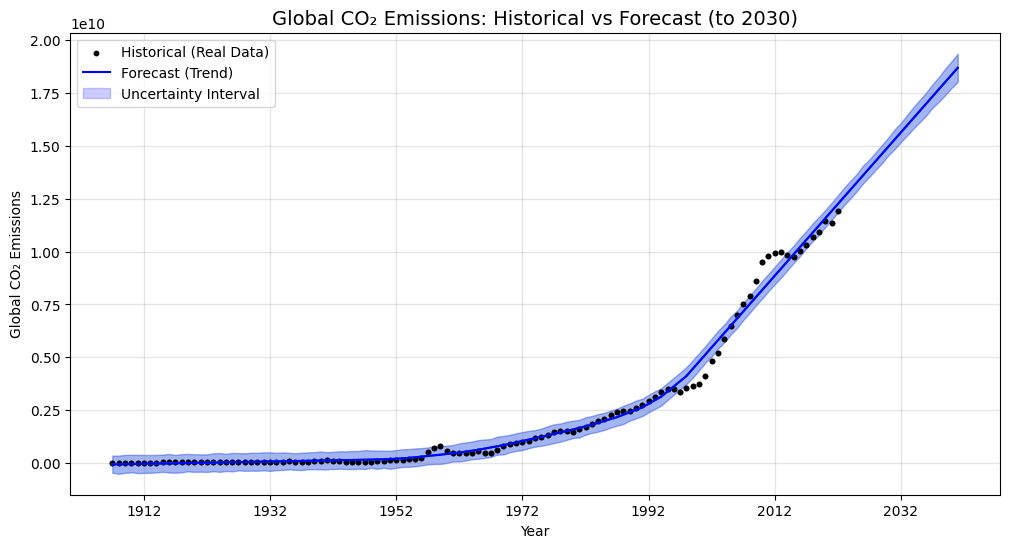

In [ ]:
# one country


import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np

# --- Prepare data ---

# Aggregate global CO2 emissions

# for ONE COUNTRY CODE HERE. WHATEVER COUNTRY WANT PUT HERE
country_emissions = df_final[df_final["Country"] == 'China']
#print(country_emissions.head(100))

# Rename columns for Prophet
country_emissions.rename(columns={"Year": "ds", "Target_Emissions": "y"}, inplace=True)
country_emissions['ds'] = pd.to_datetime(country_emissions['ds'], format='%Y')
country_emissions = country_emissions[country_emissions['y'] > 0]  # remove zeros

# --- Fit Prophet model ---
# Fit Prophet
m = Prophet()
m.fit(country_emissions)

# Determine horizon
last_year = country_emissions['ds'].dt.year.max()
horizon = 2041 - last_year   # number of years until 2040

# Forecast until 2030
future = m.make_future_dataframe(periods=horizon, freq='YE')
forecast = m.predict(future)



import matplotlib.pyplot as plt

# Prophet default plot
fig, ax = plt.subplots(figsize=(12,6))
m.plot(forecast, ax=ax)

# Add custom legend
hist = ax.scatter(country_emissions['ds'], country_emissions['y'], color="black", s=10, label="Historical (Real Data)")
trend, = ax.plot(forecast['ds'], forecast['yhat'], color="blue", label="Forecast (Trend)")
uncert = ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                         color="blue", alpha=0.2, label="Uncertainty Interval")

ax.legend(handles=[hist, trend, uncert], loc="upper left")
ax.set_title("China CO₂ Emissions: Historical vs Forecast (to 2040)", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("China CO₂ Emissions")

plt.show()

In [ ]:
# all countries
from prophet import Prophet
import pandas as pd

all_forecasts = []  # list to store each country’s forecast

# loop through each country
for country in df_final["Country"].unique():
    country_emissions = df_final[df_final["Country"] == country].copy()

    # rename columns for Prophet
    country_emissions.rename(columns={"Year": "ds", "Target_Emissions": "y"}, inplace=True)
    country_emissions['ds'] = pd.to_datetime(country_emissions['ds'], format='%Y')
    country_emissions = country_emissions[country_emissions['y'] > 0]  # remove zeros

    if len(country_emissions) < 2:  # Prophet needs enough data
        continue

    # fit Prophet
    m = Prophet()
    m.fit(country_emissions)

    # forecast horizon until 2041
    last_year = country_emissions['ds'].dt.year.max()
    horizon = 2041 - last_year
    future = m.make_future_dataframe(periods=horizon, freq='YE')
    forecast = m.predict(future)

    # add country name to results
    forecast['Country'] = country

    # keep only the important columns
    forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'Country']]

    # store
    all_forecasts.append(forecast)

# combine all into one big table
all_forecasts_df = pd.concat(all_forecasts, ignore_index=True)

# show sample
print(all_forecasts_df.head(20))


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwe0oa_5/pkgwprgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiwe0oa_5/2nuie6ab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60396', 'data', 'file=/tmp/tmpiwe0oa_5/pkgwprgr.json', 'init=/tmp/tmpiwe0oa_5/2nuie6ab.json', 'output', 'file=/tmp/tmpiwe0oa_5/prophet_model2ttcaqhq/prophet_model-20250830001508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

           ds           yhat    yhat_lower    yhat_upper      Country
0  1949-01-01 -420845.642051 -2.532510e+06  1.681278e+06  Afghanistan
1  1950-01-01 -374766.169009 -2.676862e+06  1.811268e+06  Afghanistan
2  1951-01-01 -354461.959856 -2.429133e+06  1.697182e+06  Afghanistan
3  1952-01-01 -359854.116993 -2.492542e+06  1.711595e+06  Afghanistan
4  1953-01-01 -105970.079907 -2.138293e+06  1.958824e+06  Afghanistan
5  1954-01-01  -59890.606928 -2.143293e+06  2.057021e+06  Afghanistan
6  1955-01-01  -39586.397869 -2.272043e+06  2.057383e+06  Afghanistan
7  1956-01-01  -44978.555039 -2.165666e+06  2.013502e+06  Afghanistan
8  1957-01-01  208905.482038 -1.810596e+06  2.496247e+06  Afghanistan
9  1958-01-01  254984.955008 -1.906807e+06  2.354830e+06  Afghanistan
10 1959-01-01  275289.164152 -1.655167e+06  2.546872e+06  Afghanistan
11 1960-01-01  269897.007068 -1.851120e+06  2.359123e+06  Afghanistan
12 1961-01-01  523781.044207 -1.629894e+06  2.656329e+06  Afghanistan
13 1962-01-01  56986

In [ ]:
all_forecasts_df['ds'] = all_forecasts_df['ds'].dt.year
#all_forecasts_df.tail()

#for years just have ones after 2020 for each country
all_forecasts_df = all_forecasts_df[all_forecasts_df['ds']>=2020]


#lower and upper are safe boundaries

all_forecasts_df.rename(columns={
  'ds' :'Year', 'yhat' : "Emissions", 'yhat_lower' : "Lower Bound", 'yhat_upper' : "Upper Bound",

}, inplace= True)

all_forecasts_df.head()



Year     Emissions   Lower Bound   Upper Bound      Country
71  2020  9.012435e+06  6.846140e+06  1.096137e+07  Afghanistan
72  2021  9.427477e+06  7.386093e+06  1.150253e+07  Afghanistan
73  2022  9.634275e+06  7.409688e+06  1.161504e+07  Afghanistan
74  2022  9.325698e+06  7.137537e+06  1.153224e+07  Afghanistan
75  2023  9.379925e+06  7.266895e+06  1.148858e+07  Afghanistan

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Emissions'].plot(kind='hist', bins=20, title='Emissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Lower Bound'].plot(kind='hist', bins=20, title='Lower Bound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Year', y='Emissions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Emissions', y='Lower Bound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Lower Bound', y='Upper Bound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Emissions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Emissions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Lower Bound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Lower Bound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Upper Bound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Upper Bound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Emissions'].plot(kind='line', figsize=(8, 4), title='Emissions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Lower Bound'].plot(kind='line', figsize=(8, 4), title='Lower Bound')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
all_forecasts_df.to_csv('Climate Emissions Projection')

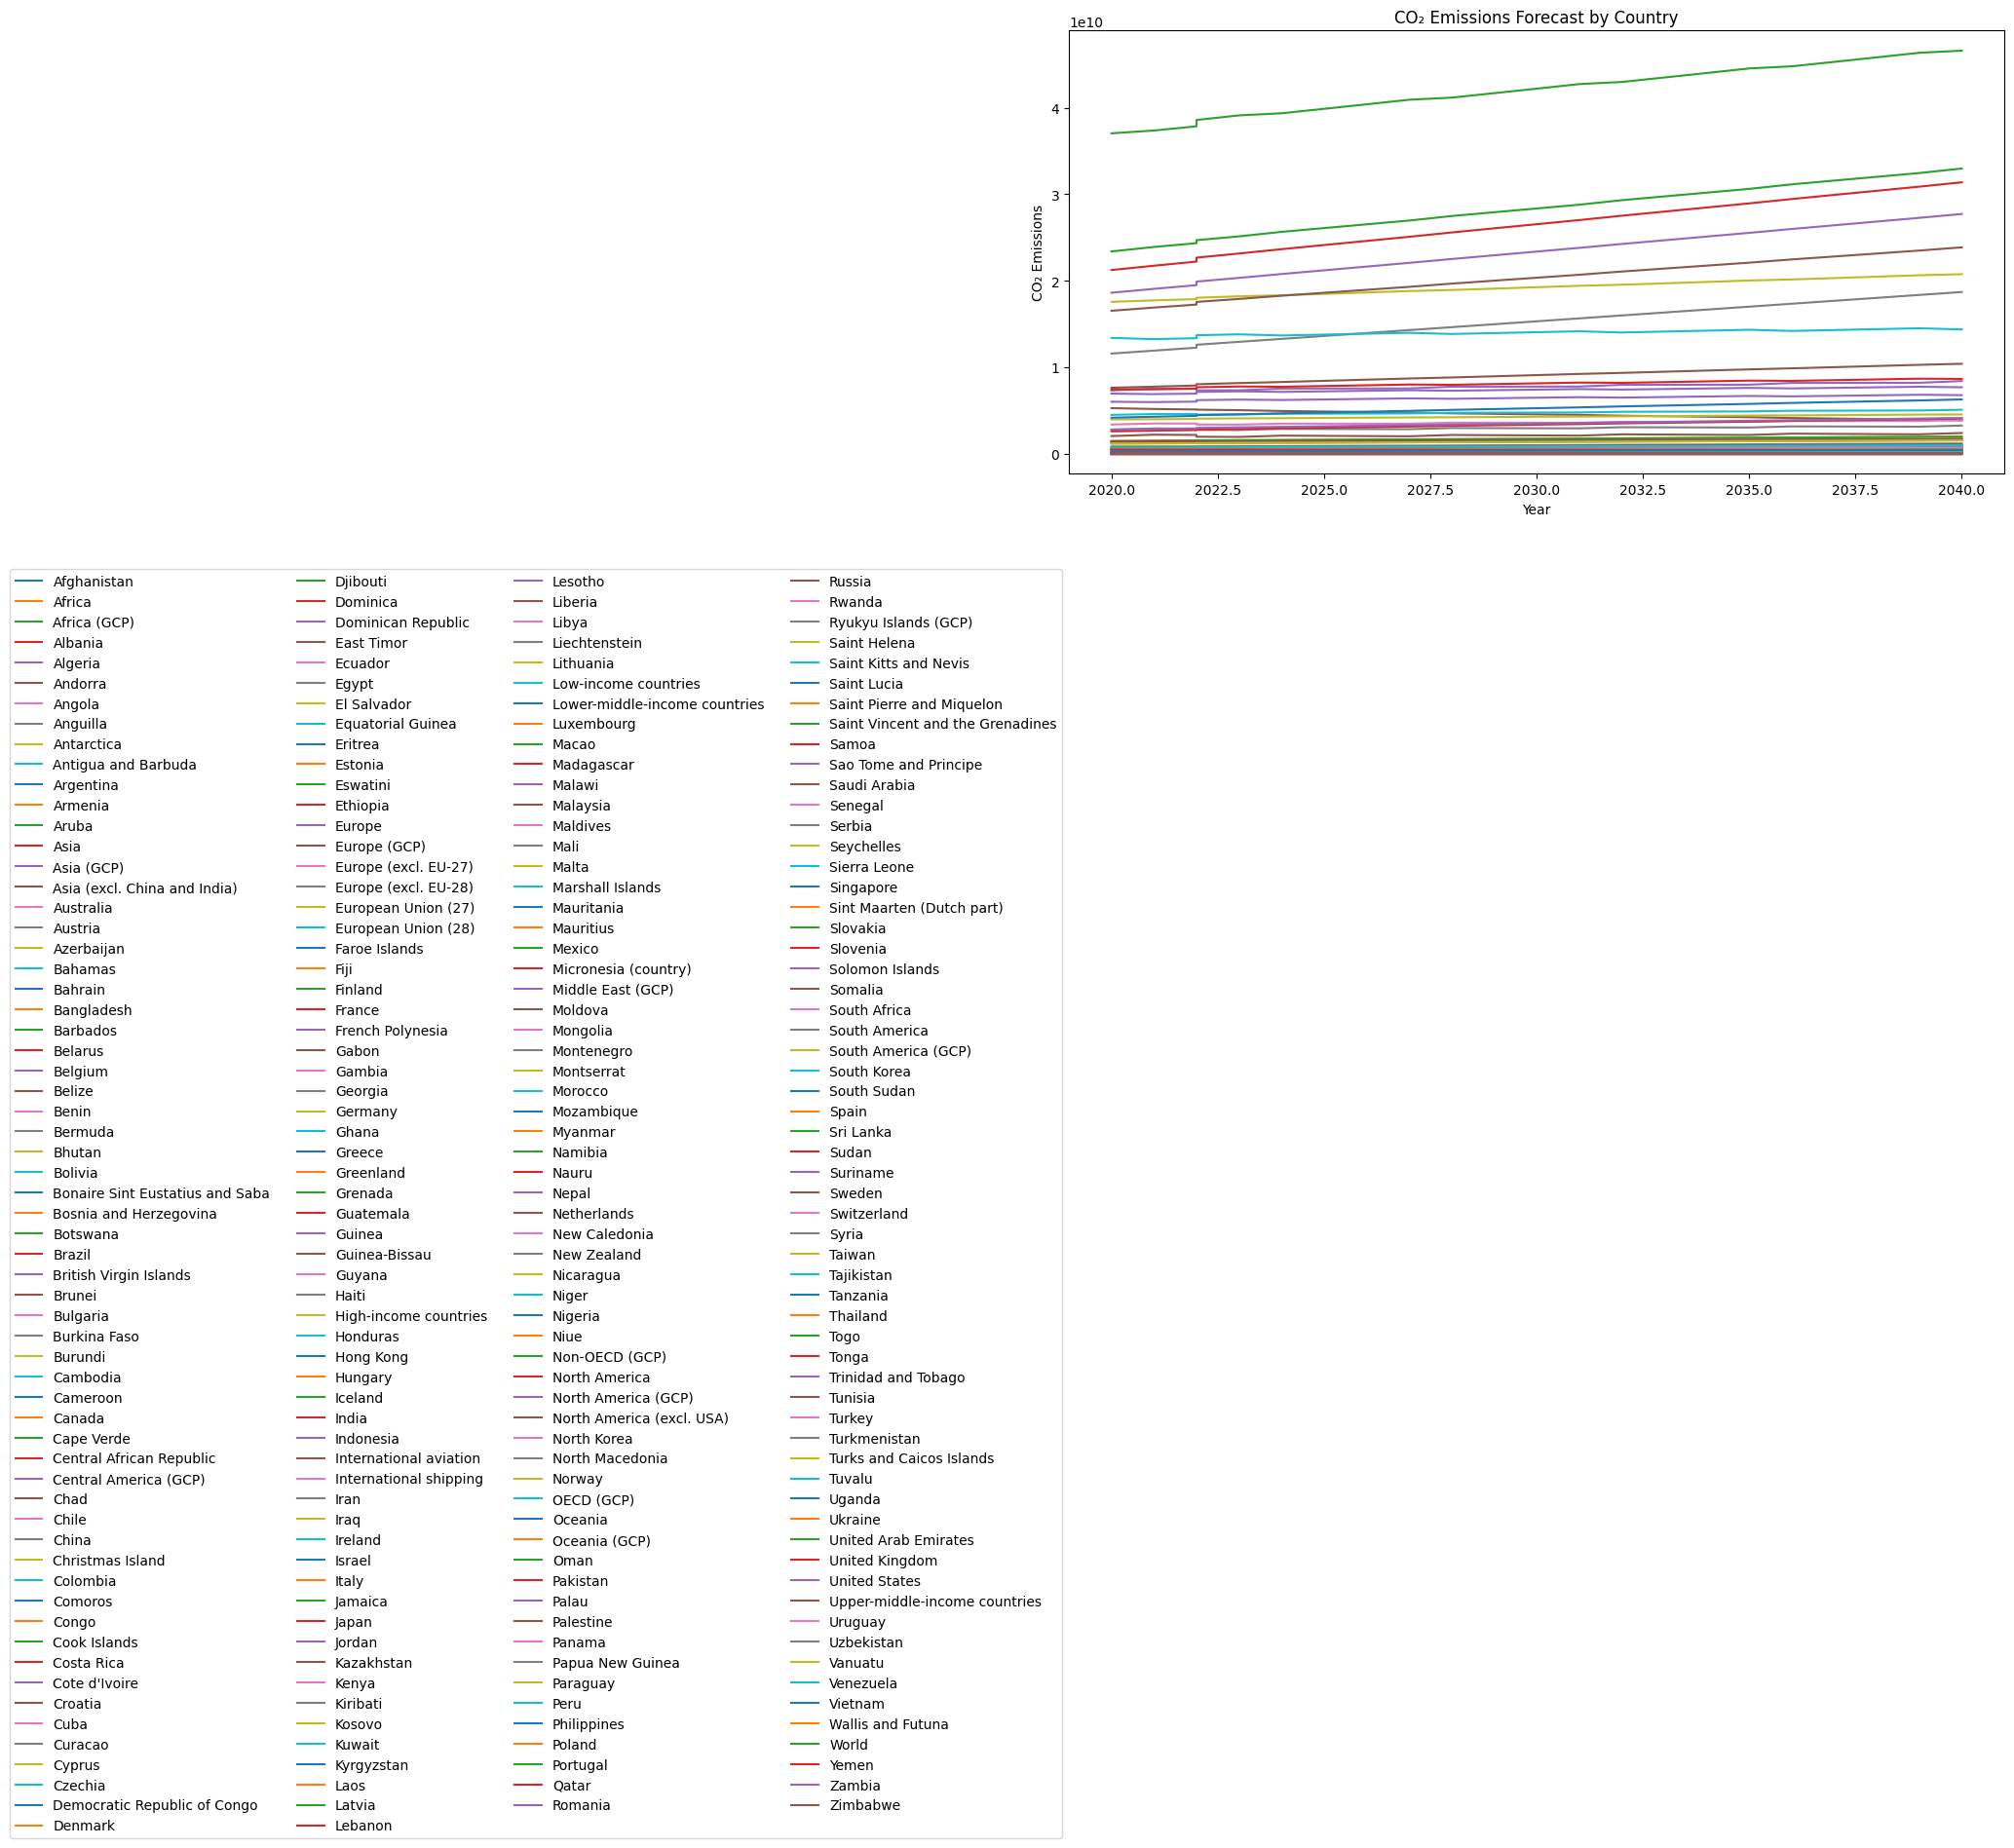

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

# Loop through each country and plot
for country in all_forecasts_df["Country"].unique():
    data = all_forecasts_df[all_forecasts_df["Country"] == country]
    plt.plot(data["Year"], data["Emissions"], label=country)

plt.title("CO₂ Emissions Forecast by Country")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.legend(loc= 'upper right', bbox_to_anchor=(0, -0.2), ncol=4, )
plt.subplots_adjust(left= 0.1, right= 0.9, bottom= 0.25, top= 0.9)
plt.show()